In [41]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(43)
%matplotlib inline

In [42]:
# Helper Functions
def plot_scatter(X, y, w):
    # Set figure size for better visibility
    plt.figure(figsize=(8, 6))
    
    # Plot the data points
    pos_points = X[y == 1]
    neg_points = X[y == -1]
    plt.scatter(pos_points[:, 1], pos_points[:, 2], color='blue', label='Positive Class')
    plt.scatter(neg_points[:, 1], neg_points[:, 2], color='red', label='Negative Class')
    
    # Plot decision boundary
    xx = np.linspace(-6, 6, 100)  # More points for smoother line
    yy = (-w[0] - w[1] * xx) / w[2]  # Rewritten for clarity
    plt.plot(xx, yy, color='orange', label='Decision Boundary')
    
    # Plot weight vector
    ratio = 1  # Simplified ratio calculation
    xpt, ypt = 0, -w[0]/w[2]  # Start point at x=0
    plt.arrow(xpt, ypt, w[1], w[2], head_width=0.2, color='orange', label='Weight Vector')
    
    # Add labels and legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    
    # Set reasonable axis limits
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()

def analyze_learning_rates(X, y, learning_rates, epochs=10, use_stochastic=False):
    """
    Analyze the impact of different learning rates on the loss function
    
    Parameters:
    - X, y: training data and labels
    - learning_rates: list of learning rates to test
    - epochs: number of epochs to run for each rate
    - use_stochastic: whether to use stochastic or batch gradient descent
    """
    results = {}
    
    for eta in learning_rates:
        losses = []
        w = np.array([-2,-1,-1])
        nmb_data = X.shape[0]
        
        for t in range(epochs):
            loss = 0
            grad_loss = 0
            
            if use_stochastic:
                # Stochastic version
                for i in range(nmb_data):
                    loss += loss_i(w, X[i], y[i])
                    grad_loss += grad_loss_i(w, X[i], y[i])
                    w = w - eta * grad_loss
                    grad_loss = 0  # Reset gradient after each update
            else:
                # Batch version
                for i in range(nmb_data):
                    loss += loss_i(w, X[i], y[i])
                    grad_loss += grad_loss_i(w, X[i], y[i])
                w = w - eta * grad_loss
            
            loss *= 0.5
            loss = min(loss, 1000)  # Cap loss to prevent visualization issues
            losses.append(loss)
        
        results[eta] = losses
    
    # Plot results
    plt.figure(figsize=(10, 6))
    for eta, losses in results.items():
        plt.plot(range(epochs), losses, label=f'η = {eta}')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epochs for Different Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.figure(figsize=(12, 6))  # For better visibility
    plt.yscale('log')  # To see both small and large losses clearly
    plt.show()
    
    return results

# plot_scatter(X, y, w=np.array([0, -1, 3]))
def generate_data(n=20):
    # Generate two multivariate normal distributions
    dist_01 = np.random.multivariate_normal(np.array([3, 3]), np.array([[1.0, 0.5], [0.5, 1]]), n)
    dist_02 = np.random.multivariate_normal(np.array([-1, -1]), np.array([[1.0, 0.3], [0.3, 1]]), n)
    
    # Combine the two distributions
    X_data = np.concatenate((dist_01, dist_02))
    
    # Add bias term (column of ones)
    X = np.column_stack((np.ones(2*n), X_data))
    
    # Create labels: 1 for first distribution, -1 for second
    y = np.array([1]*n + [-1]*n)
    
    # Shuffle the data
    shuffle_idx = np.random.choice(2*n, size=2*n, replace=False)
    X = X[shuffle_idx]
    y = y[shuffle_idx]
    
    return X, y
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))



In [43]:
def train_perceptron(X, y, eta=1):
    w = np.random.random(3)  # randomly init weight vector
    nmb_data = X.shape[0]

    nmb_its = 0
    counter = 0

    while True:
        for i in range(nmb_data):
            nmb_its += 1

            if (y[i] * (w.T @ X[i])) < 0:
                # mistake - update weights, reset counter
                w = w + eta * y[i] * X[i]
                plot_scatter(X, y, w)
                counter = 0
                print(f"Iteration {nmb_its}: w = {w}")

        counter += 1

        if counter > nmb_data:
            # we have cycled through the entire dataset without making an update
            plot_scatter(X, y, w)
            print(f"Converged after {nmb_its} iterations")
            return


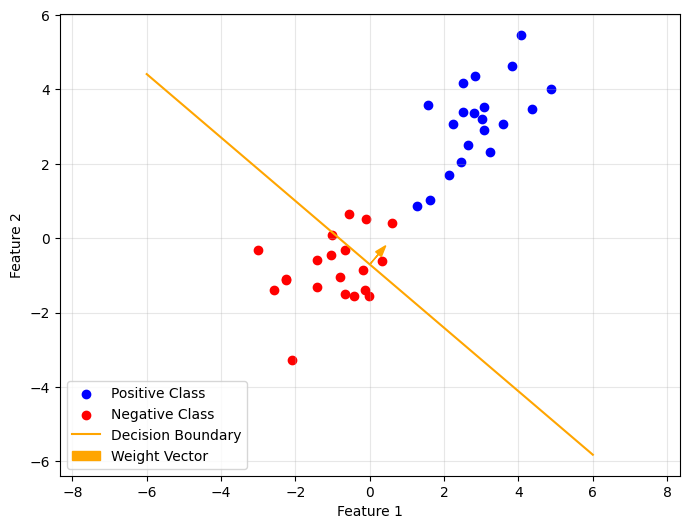

Iteration 2: w = [0.19396347 0.2344495  0.27477377]


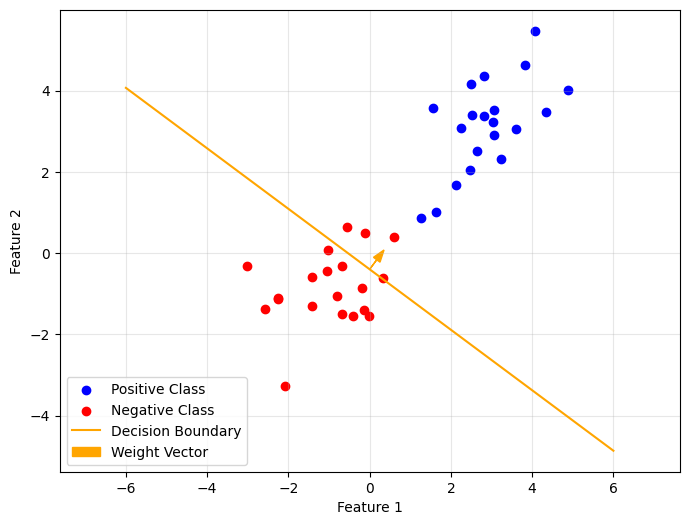

Iteration 3: w = [0.09396347 0.1747701  0.23480438]


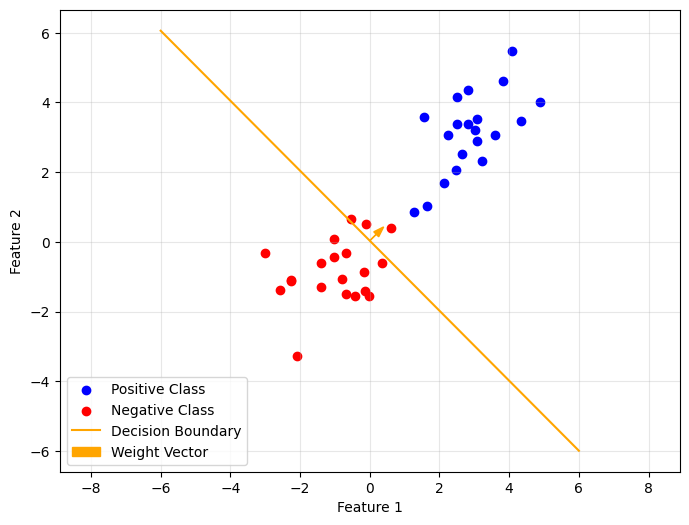

Iteration 22: w = [-0.00603653  0.18537778  0.18457953]


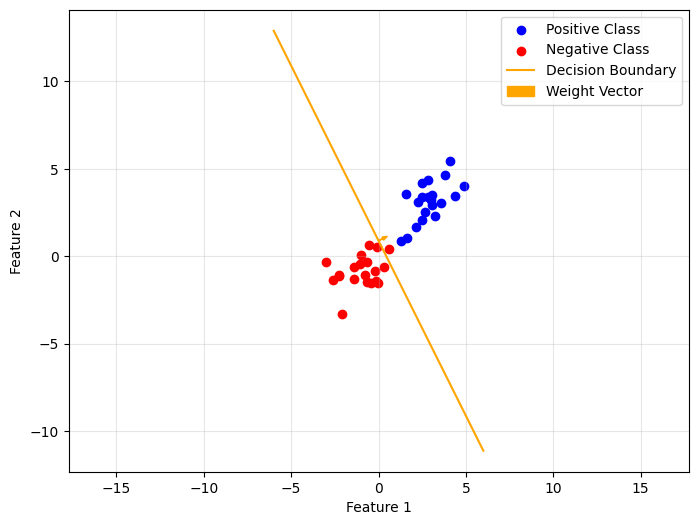

Iteration 32: w = [-0.10603653  0.24045749  0.12001635]


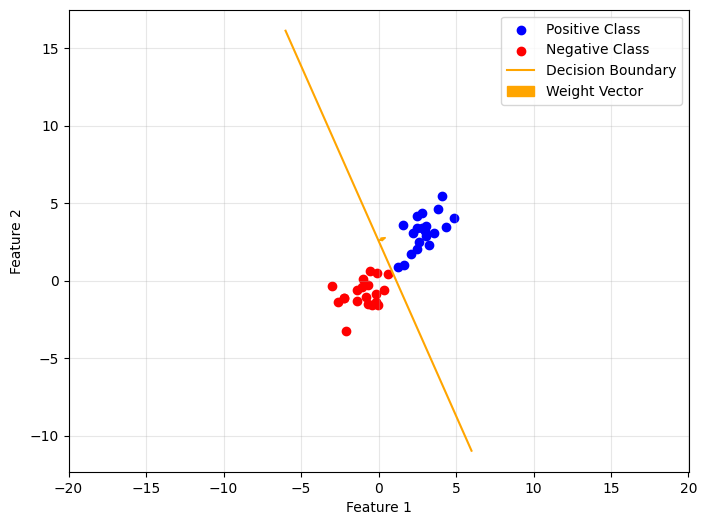

Iteration 43: w = [-0.20603653  0.18077808  0.08004697]


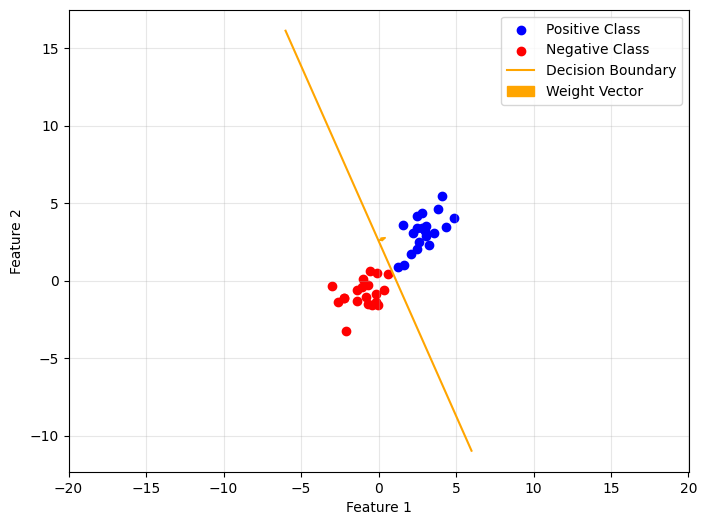

Converged after 1680 iterations


In [29]:
X, y = generate_data()
train_perceptron(X, y, eta=0.1)


In [39]:
def loss_i(w, x_i, y_i):
    '''squared loss for i-th data point'''
    return (y_i - sigmoid(w@x_i))**2

def grad_loss_i(w, x_i, y_i):
    '''grad loss for i-th data point'''
    return (y_i - sigmoid(w@x_i)) * (-x_i) * grad_sigmoid(w@x_i)

def gradient_descent(X, y, eta, T):
    # T is the number of updates -> how many times to loop through the ENTIRE dataset
    mb_data = X.shape[0]
    w = np.array([-2,-1,-1])
    
    for t in range(T):
        loss = 0
        grad_loss = 0
        for i in range(mb_data):
            loss += loss_i(w, X[i], y[i])
            grad_loss += grad_loss_i(w, X[i], y[i])
        loss *= 0.5
        print(f"loss = {loss}")
        w = w - eta * grad_loss
        plot_scatter(X,y,w)
    
    return w

def stochastic_gradient_descent(X, y, eta, T=5):
    '''Stochastic version that updates weights after each observation'''
    nmb_data = X.shape[0]
    w = np.array([-2,-1,-1])
    
    for t in range(T):
        loss = 0
        grad_loss = 0
        for i in range(nmb_data):
            loss += loss_i(w, X[i], y[i])
            grad_loss += grad_loss_i(w, X[i], y[i])
            plot_scatter(X,y,w)
        loss *= 0.5
        print(f"loss = {loss}")
        w = w - eta * grad_loss
        plot_scatter(X,y,w)
    
    return w


loss = 84.91184741138656


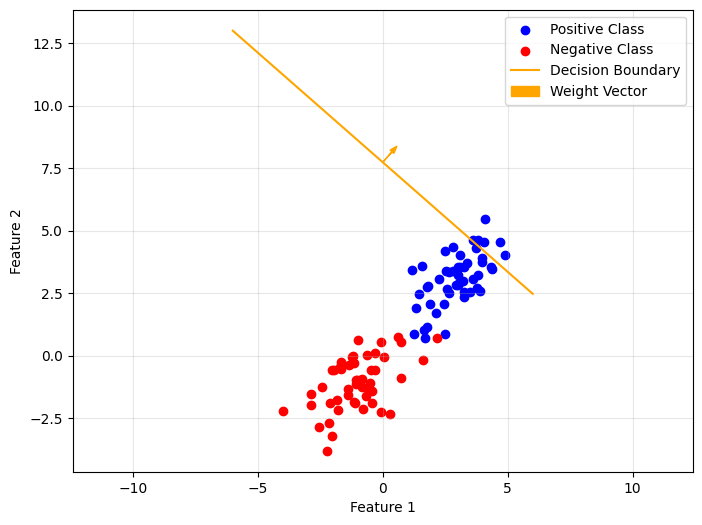

loss = 38.39103549240041


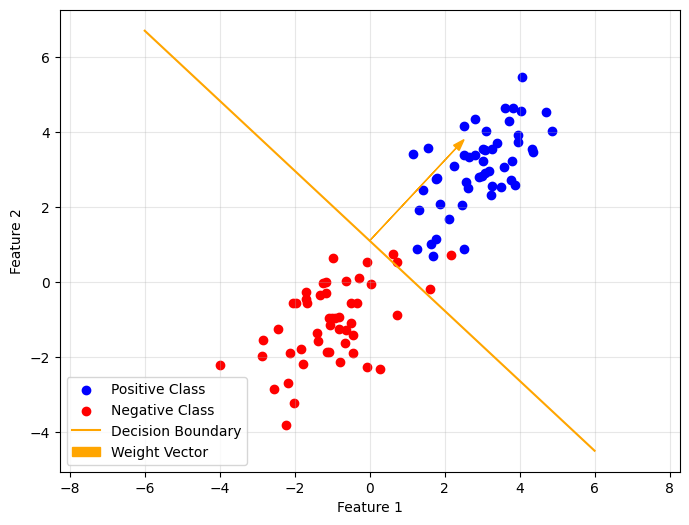

loss = 29.27388972196917


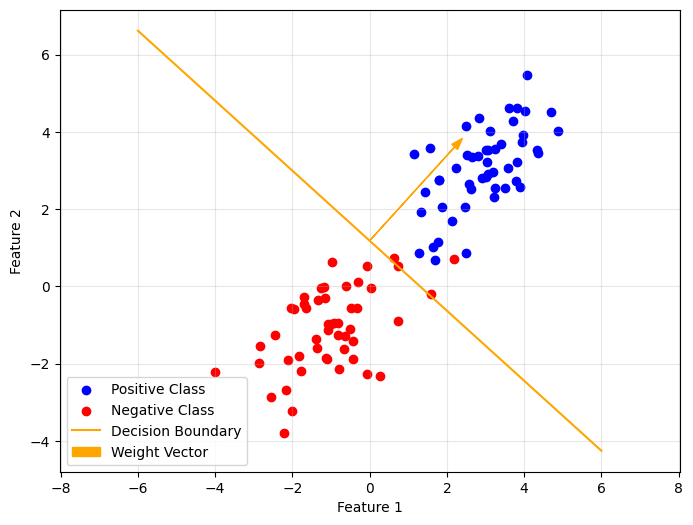

loss = 28.882167663574062


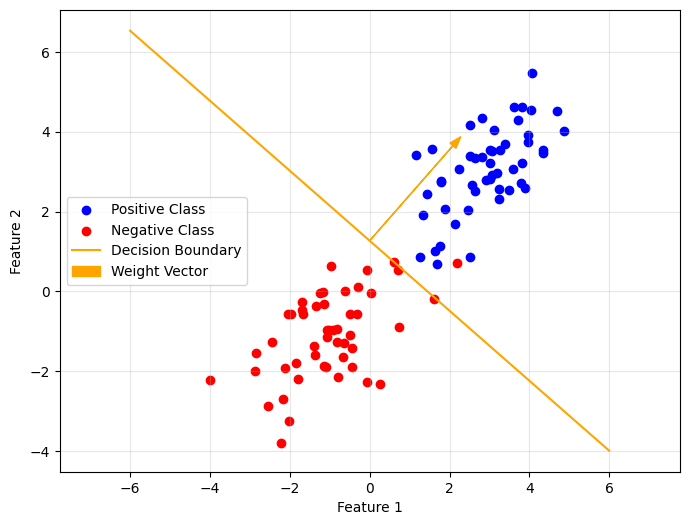

loss = 28.503463590086763


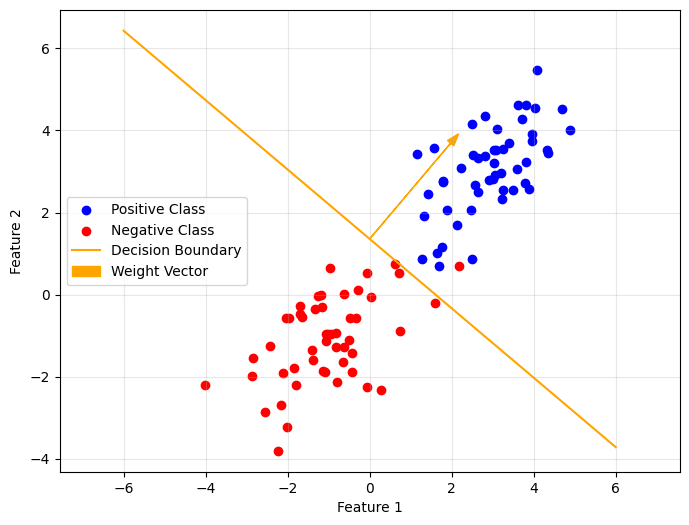

loss = 28.158890906706727


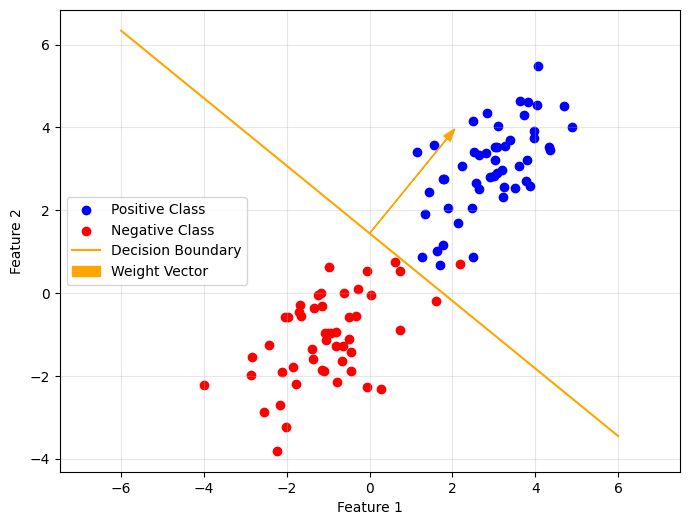

loss = 27.860820082410513


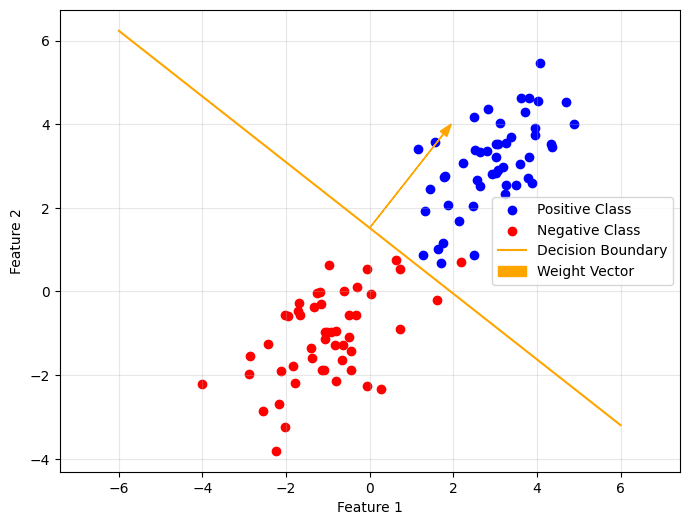

loss = 27.612021087397697


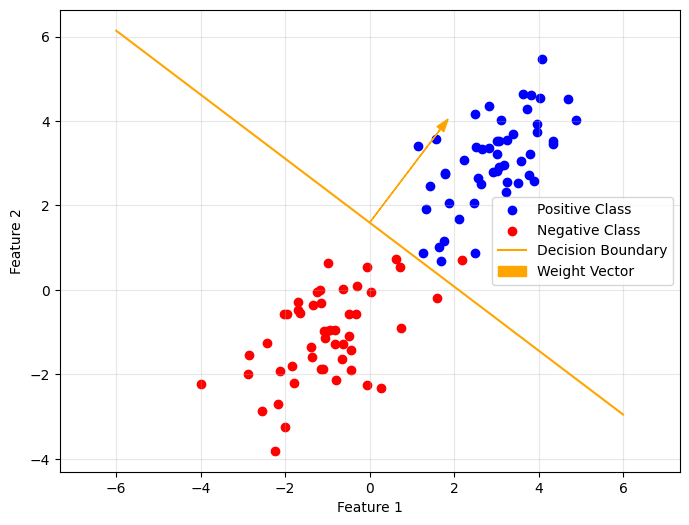

loss = 27.409497998764692


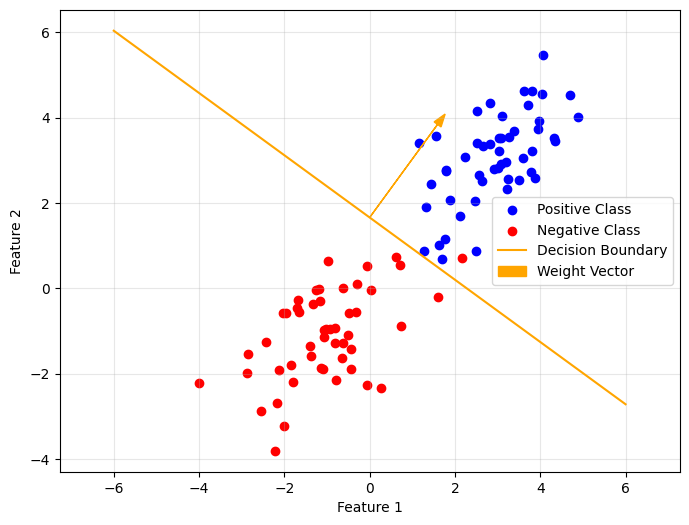

loss = 27.248362560234767


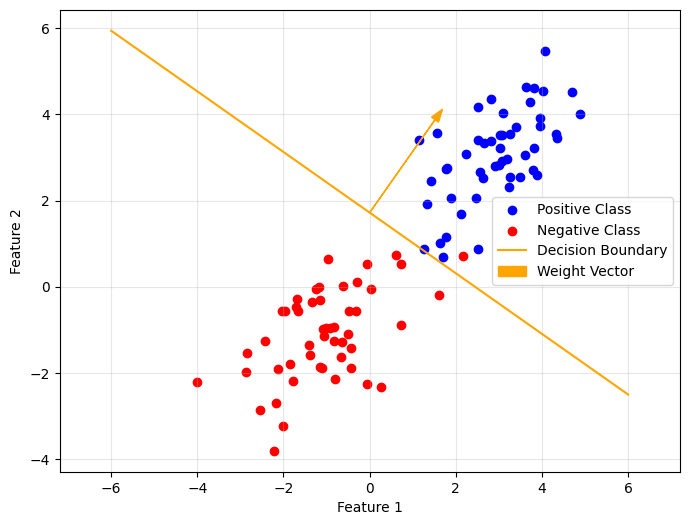

loss = 27.123625794707966


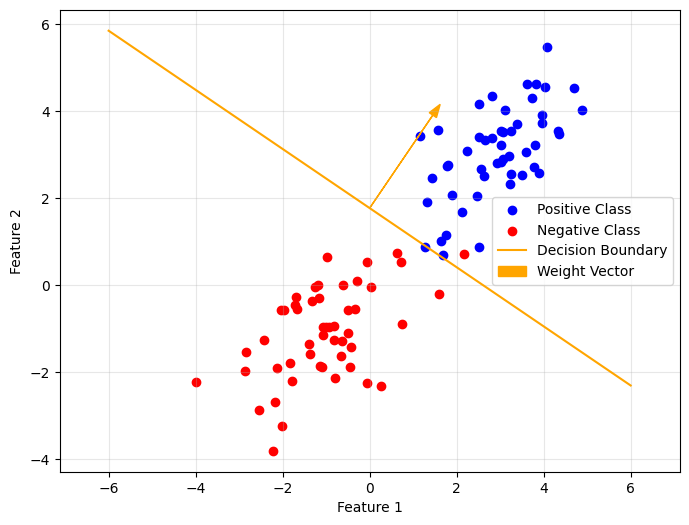

loss = 27.03030605592029


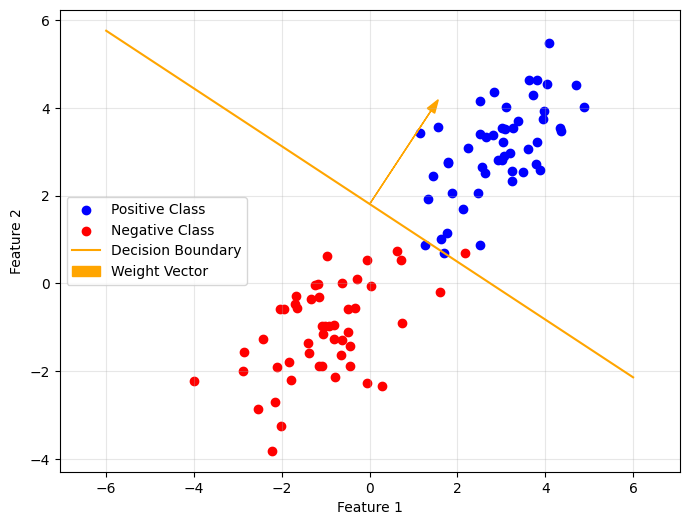

loss = 26.963025346265187


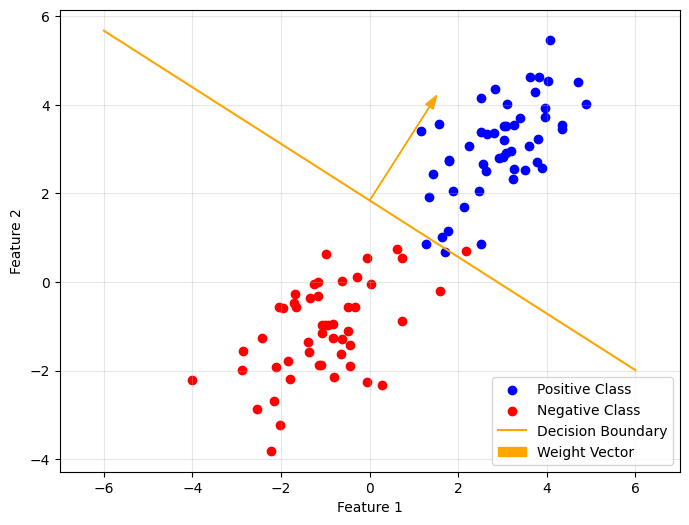

loss = 26.916005274333767


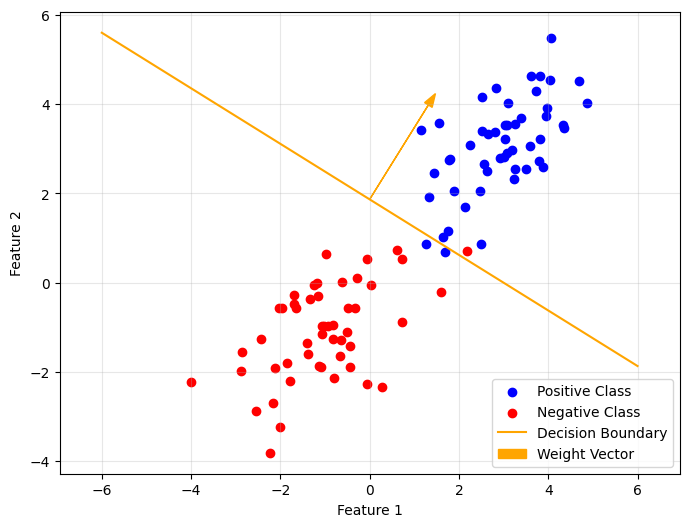

loss = 26.883626677294508


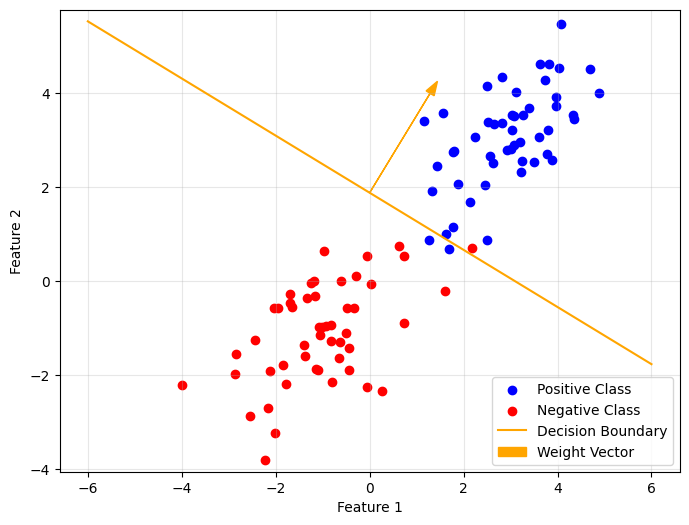

loss = 26.86110757302518


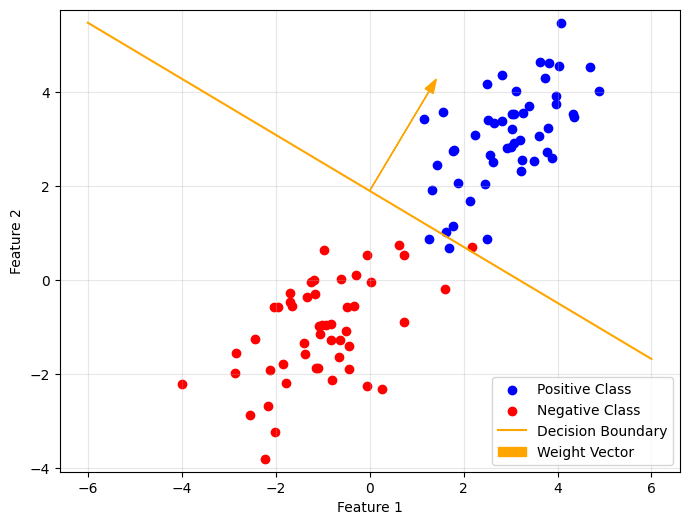

loss = 26.844858714262607


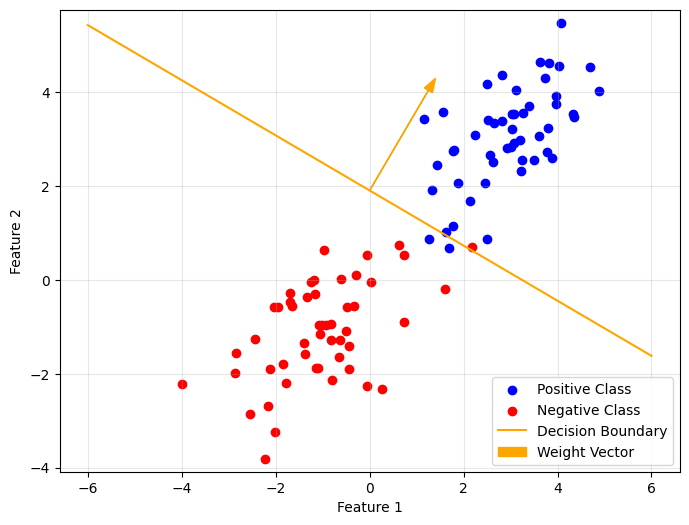

loss = 26.832447002129285


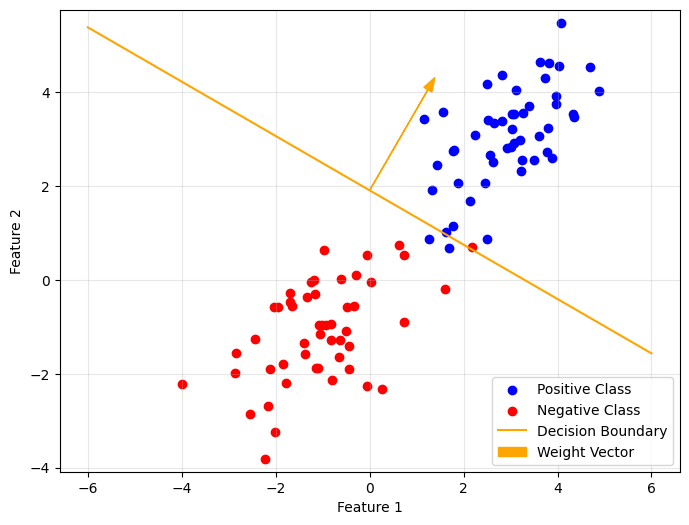

loss = 26.82234323813187


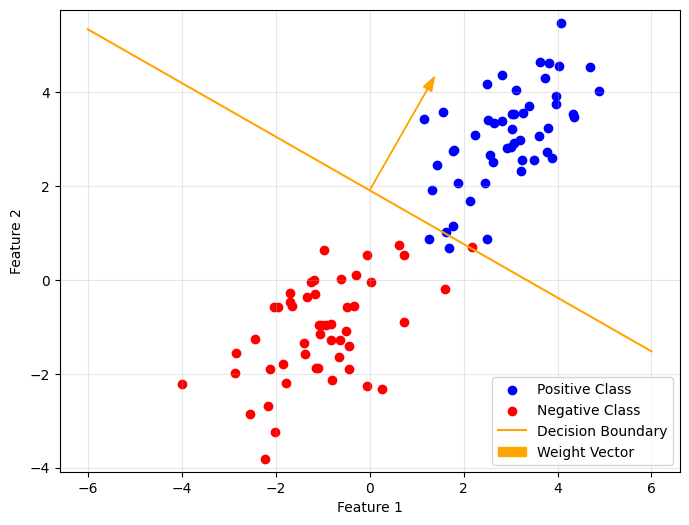

loss = 26.81363533154628


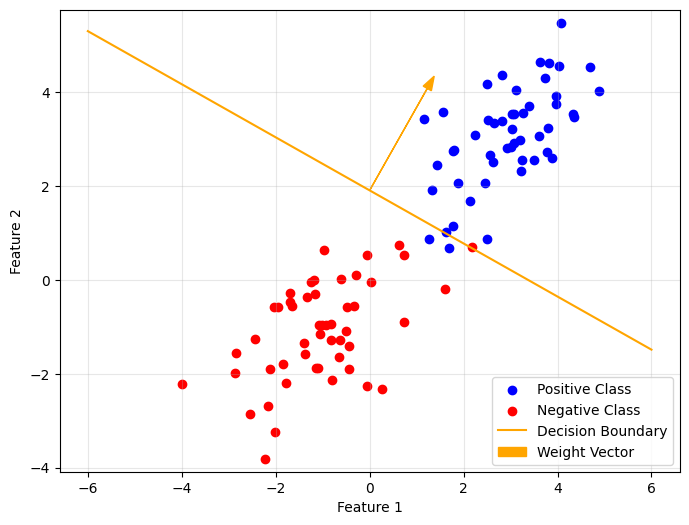

loss = 26.805796997527583


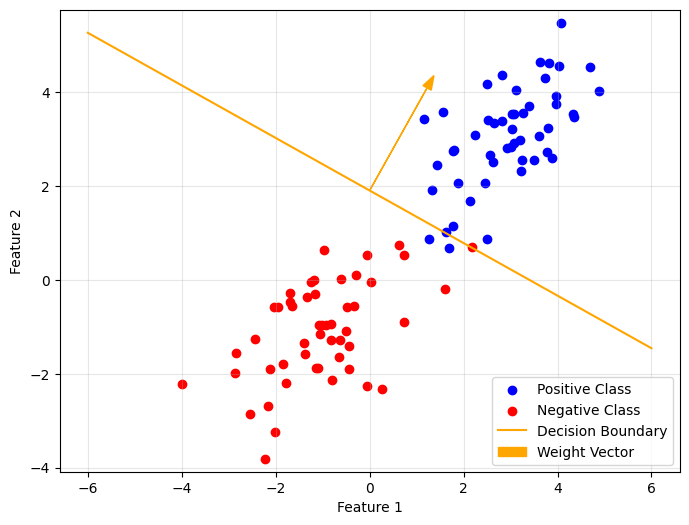

loss = 26.79852975289552


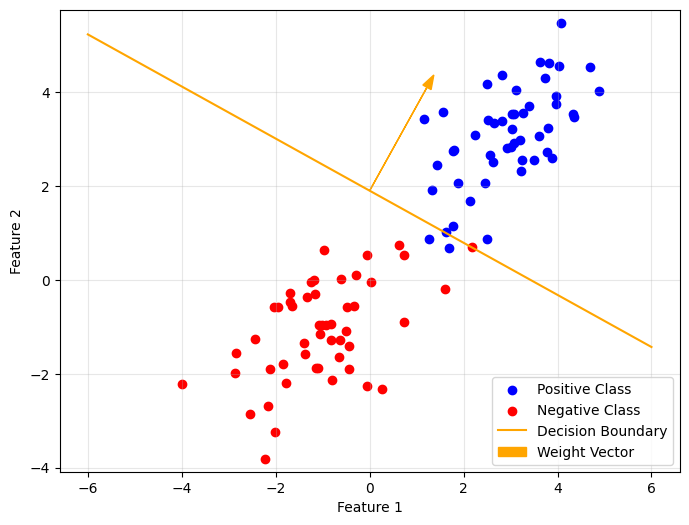

loss = 26.791664819049146


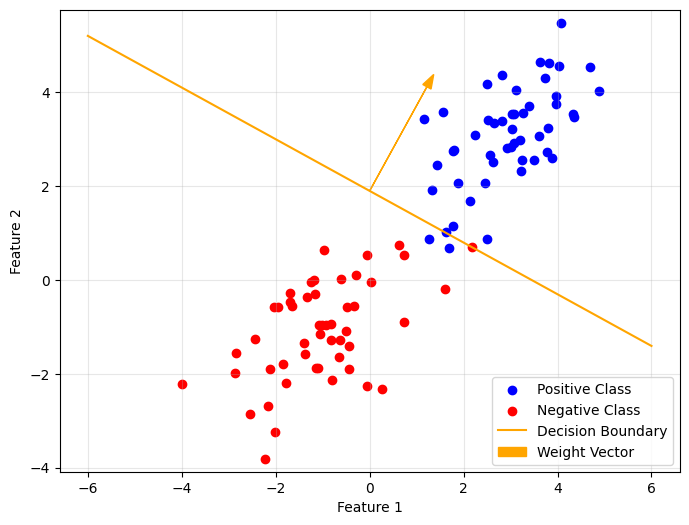

loss = 26.785105668531767


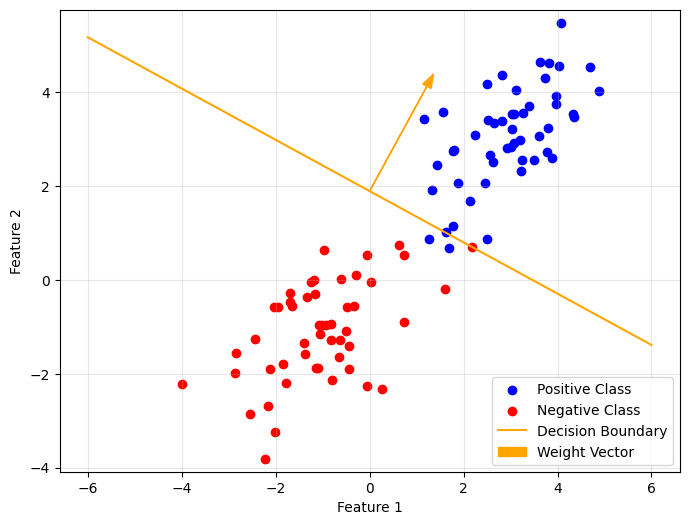

loss = 26.77879557056312


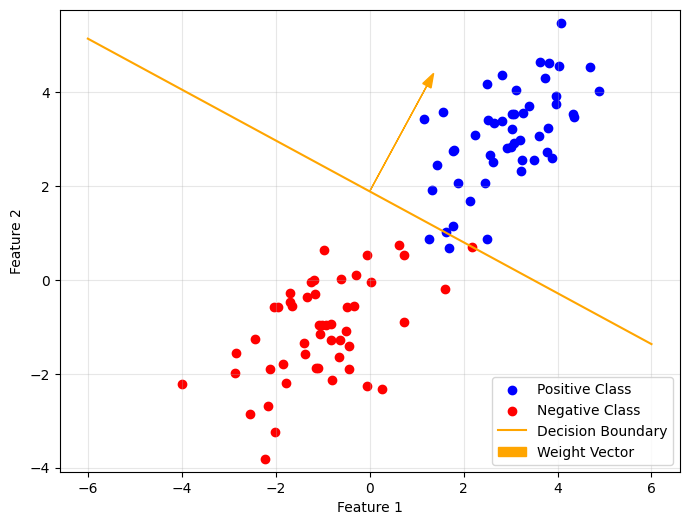

loss = 26.772699658242868


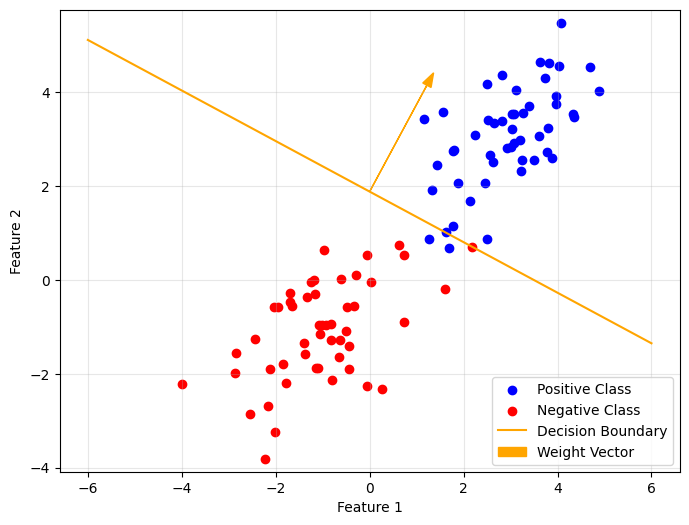

loss = 26.766795144183707


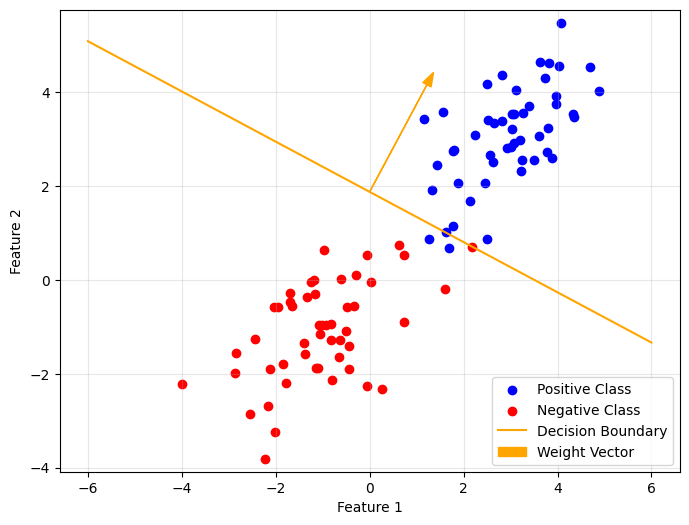

loss = 26.761066013433876


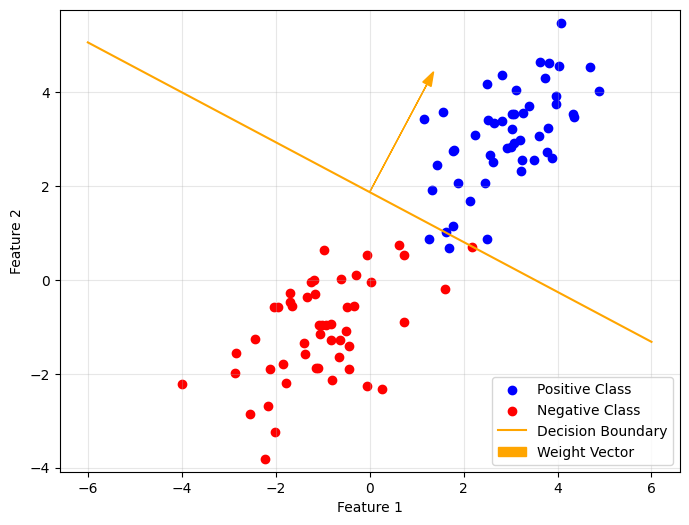

loss = 26.755500146557637


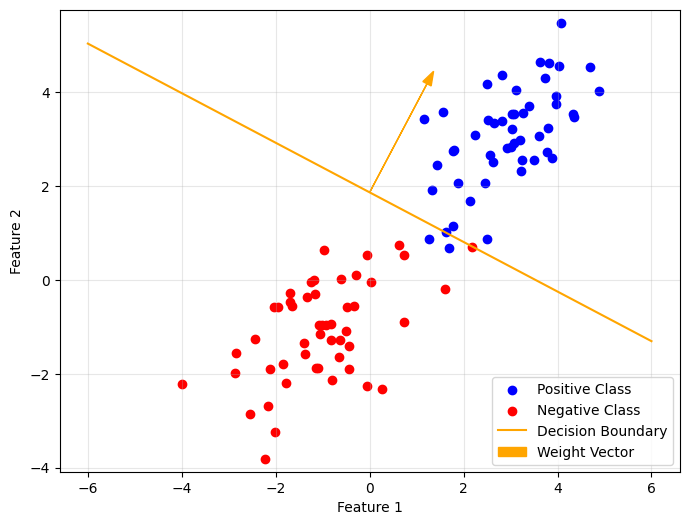

loss = 26.750087753376004


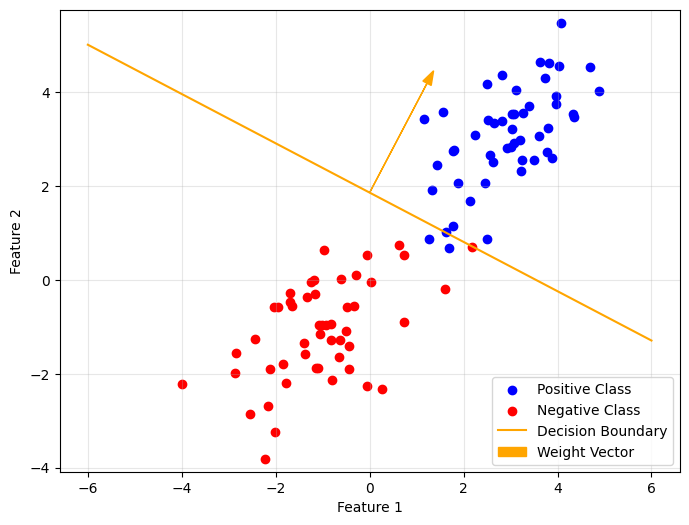

loss = 26.744820512079574


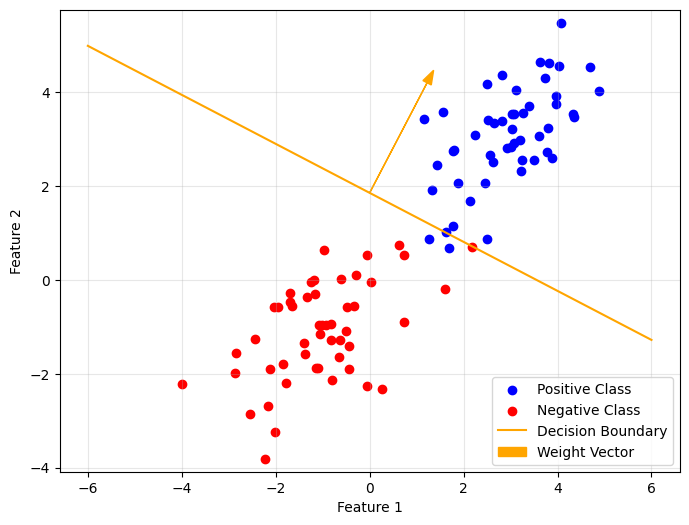

loss = 26.739691088413934


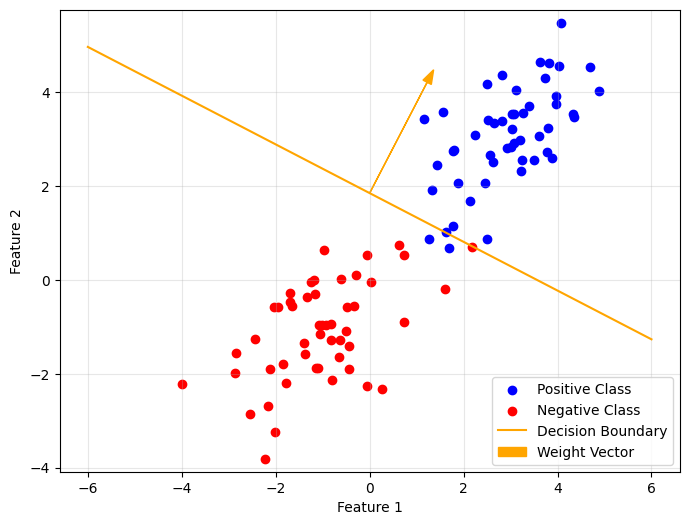

loss = 26.7346928605246


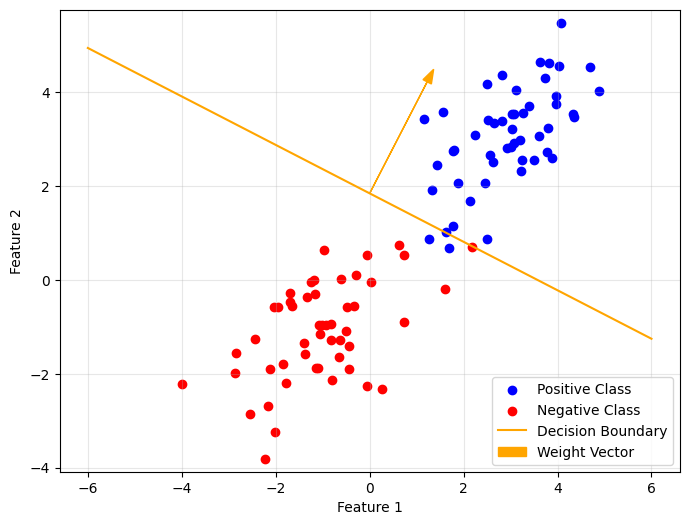

loss = 26.729819755915514


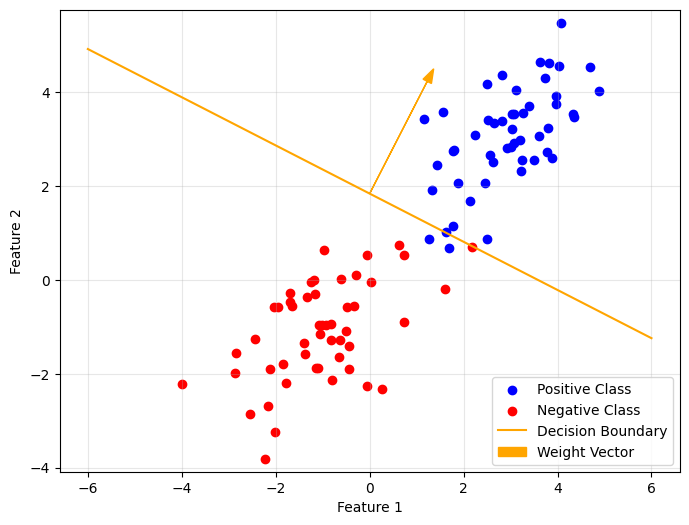

loss = 26.72506615022516


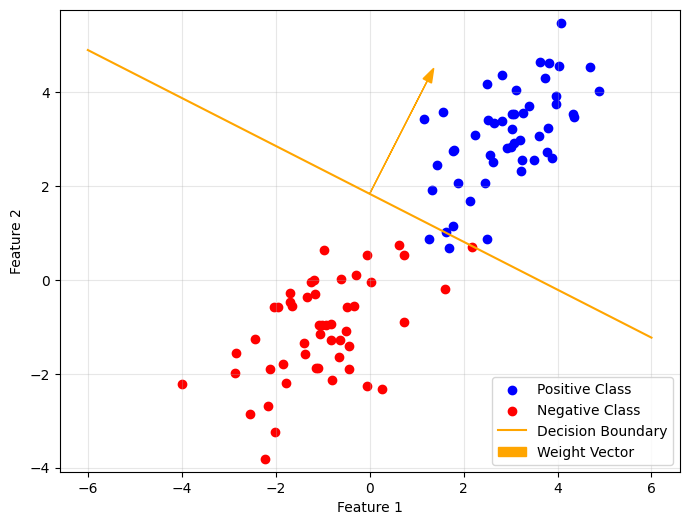

loss = 26.720426800656917


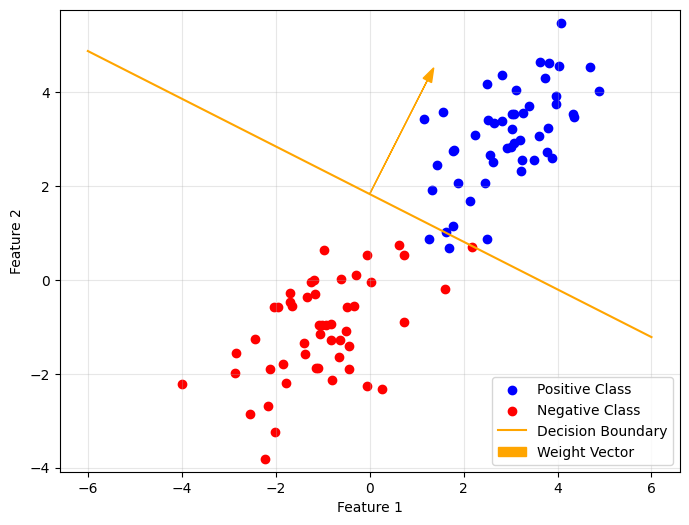

loss = 26.71589679929839


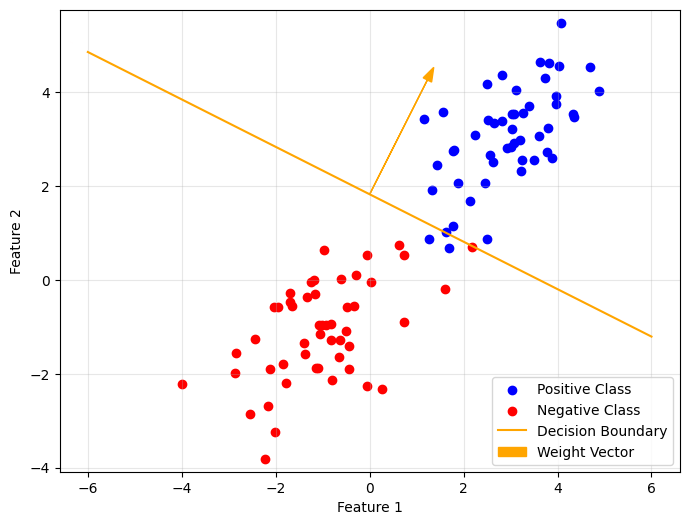

loss = 26.711471538230327


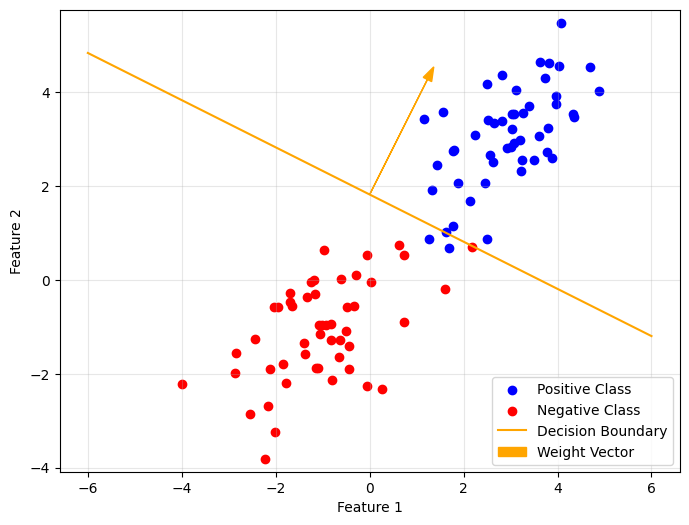

loss = 26.707146681926947


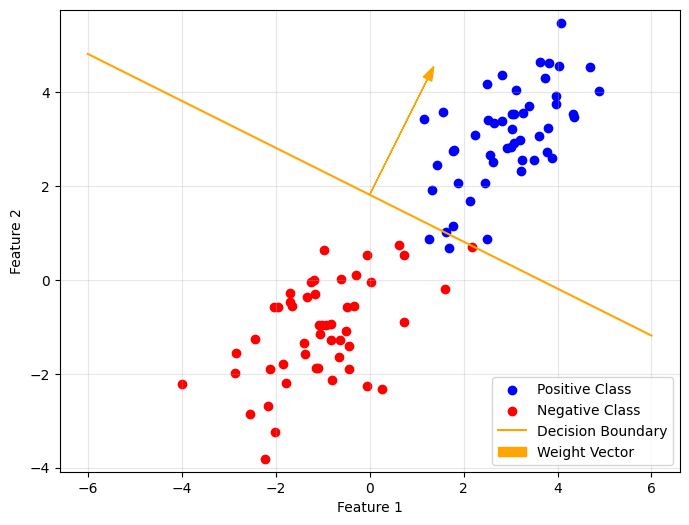

loss = 26.702918144406816


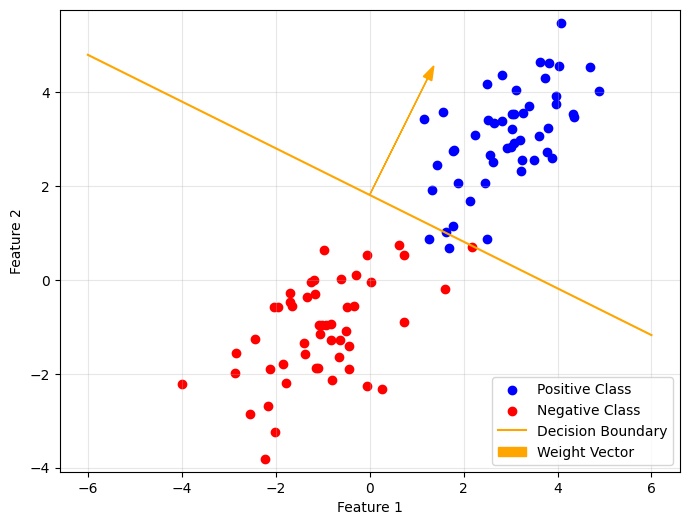

loss = 26.698782069665004


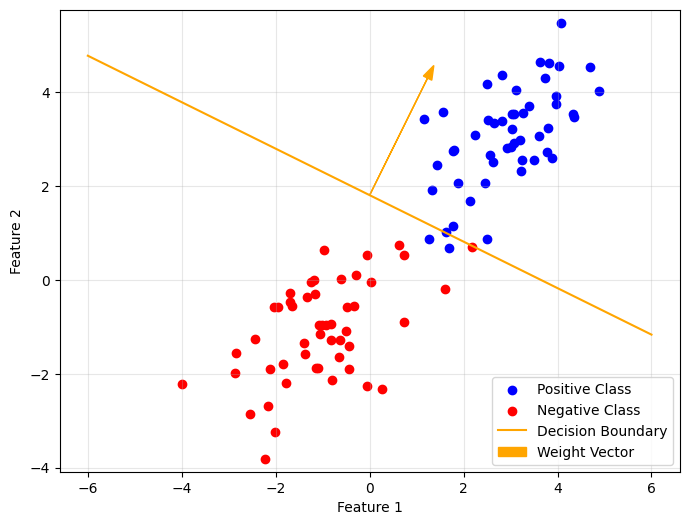

loss = 26.694734814511452


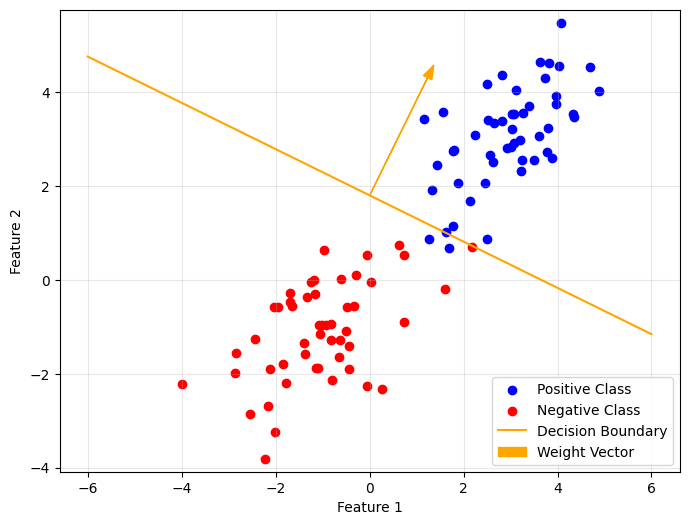

loss = 26.690772933271692


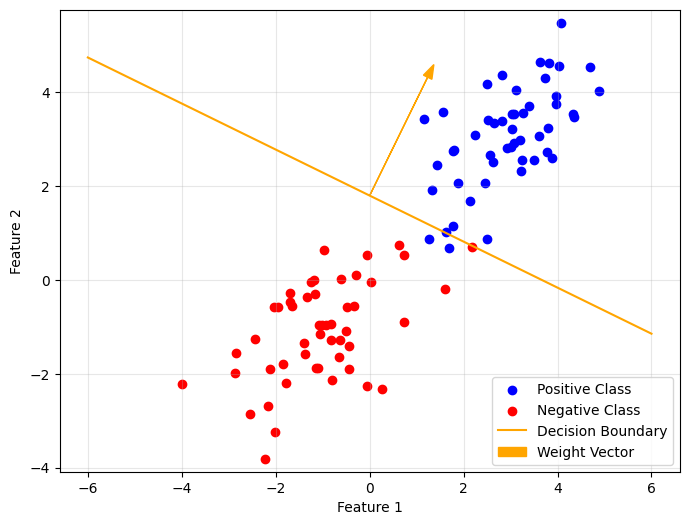

loss = 26.68689316399705


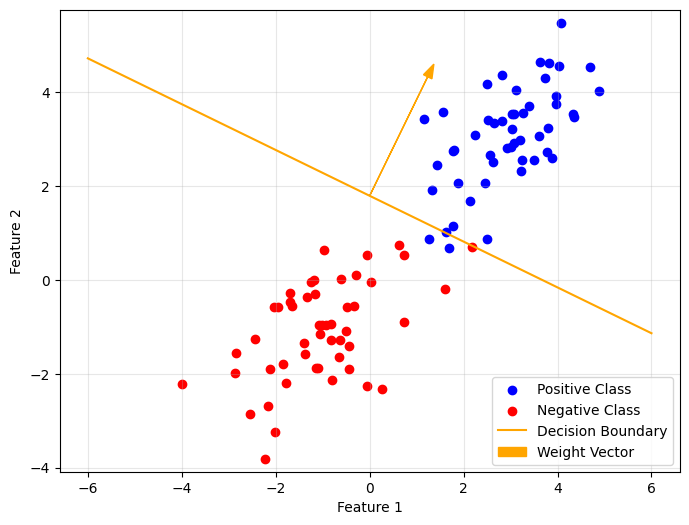

loss = 26.683092415941502


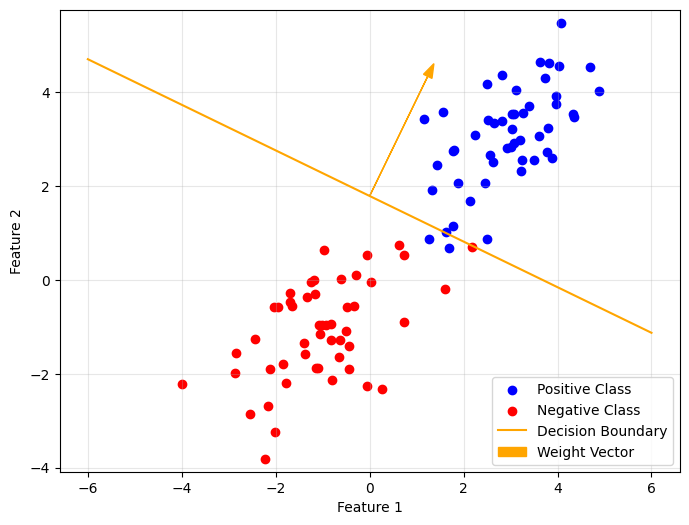

loss = 26.679367758129384


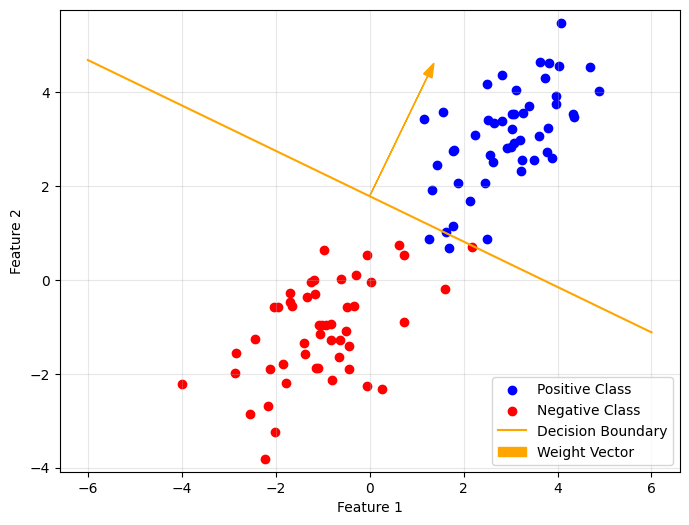

loss = 26.67571640887942


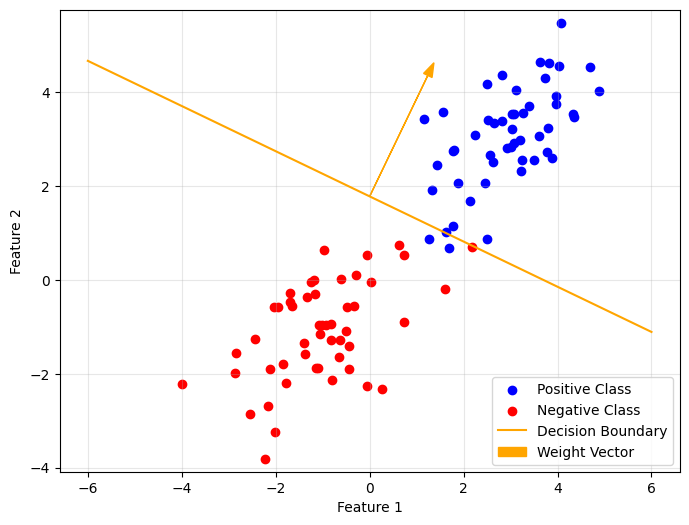

loss = 26.672135726178173


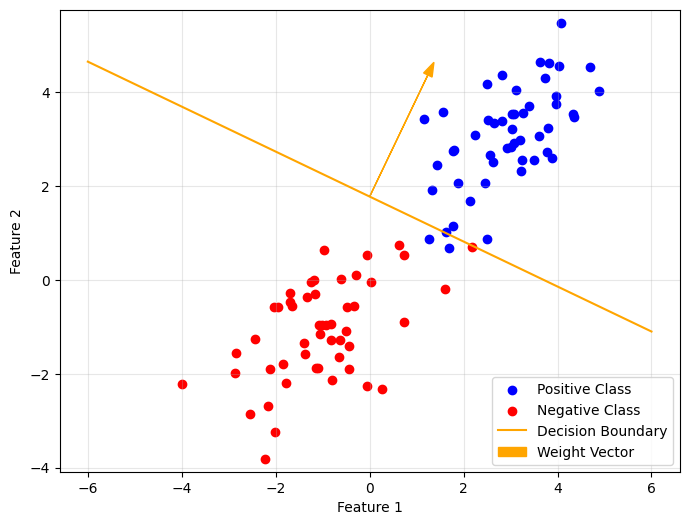

loss = 26.668623198814377


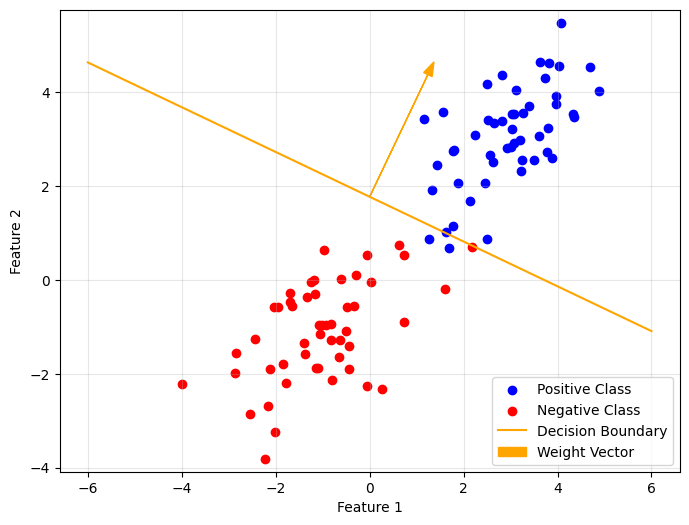

loss = 26.66517643819906


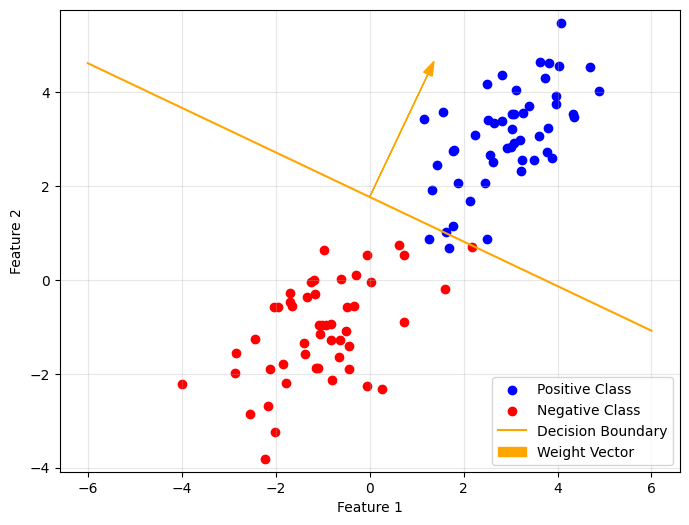

loss = 26.661793170806675


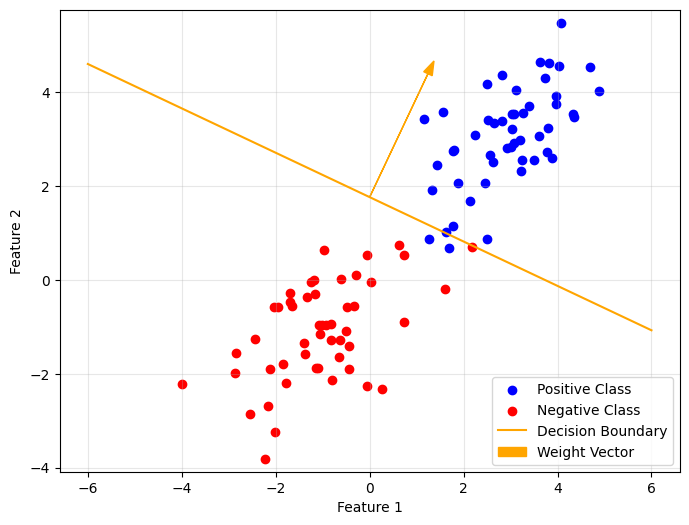

loss = 26.65847123118062


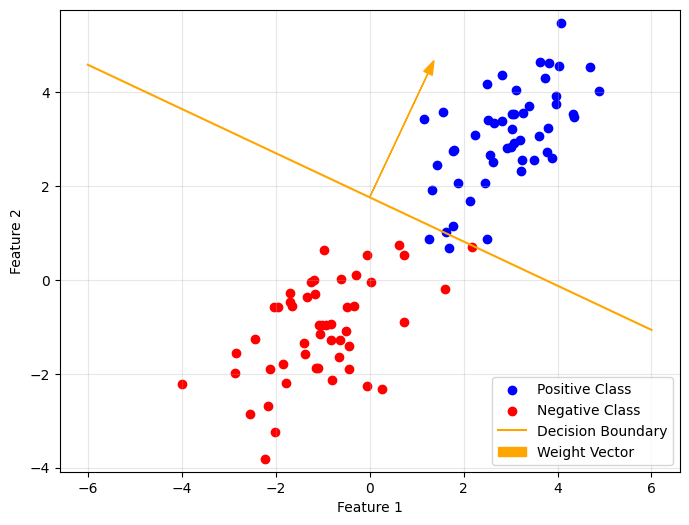

loss = 26.655208555452468


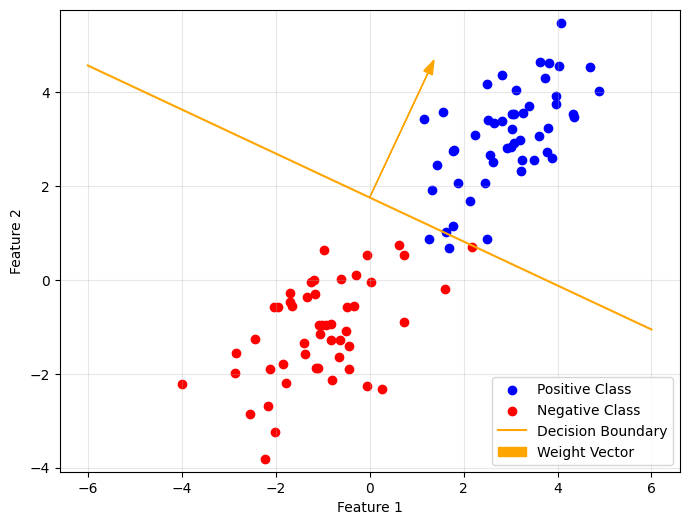

loss = 26.652003175330776


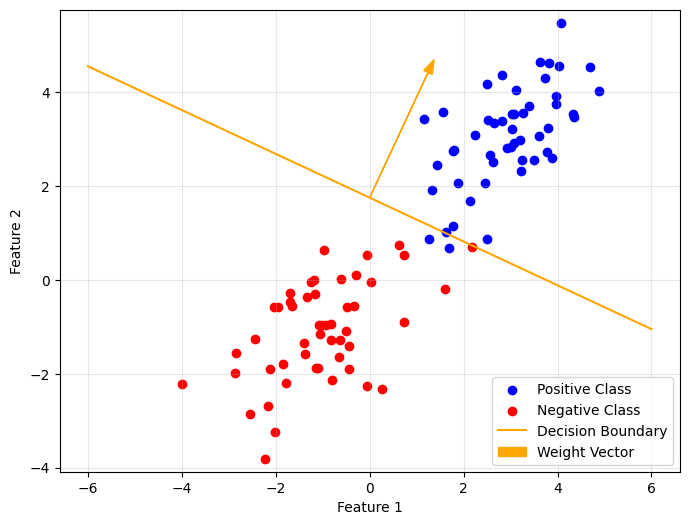

loss = 26.648853212518873


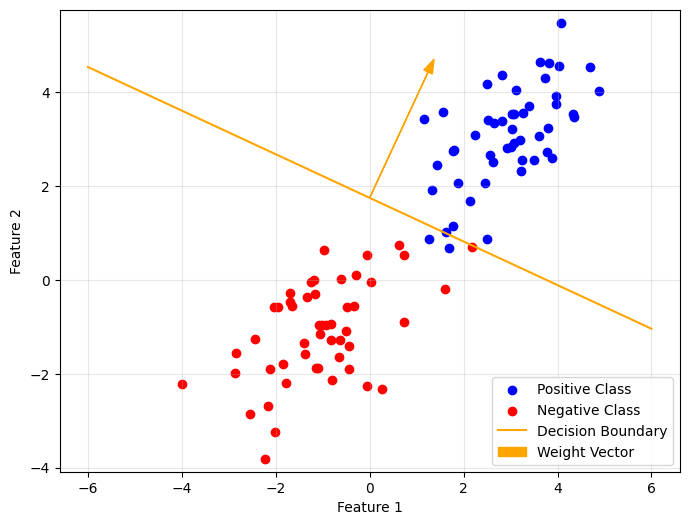

loss = 26.645756873525816


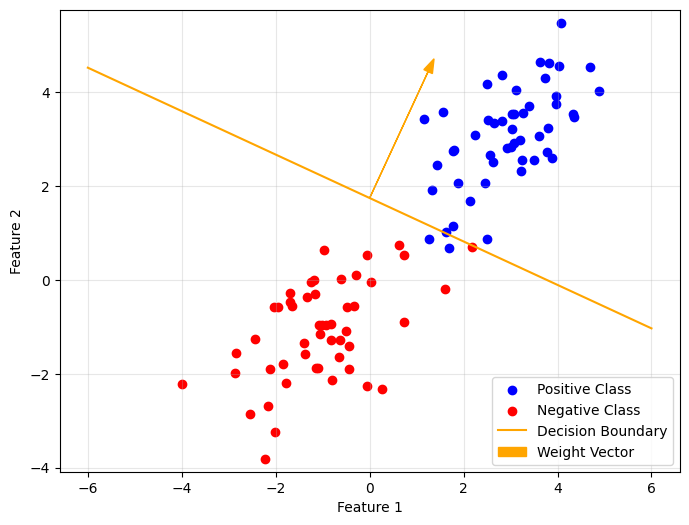

loss = 26.642712444838097


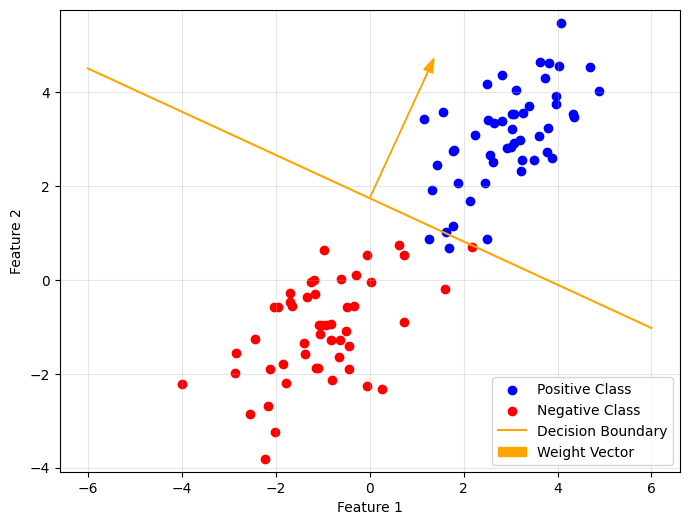

loss = 26.639718288422554


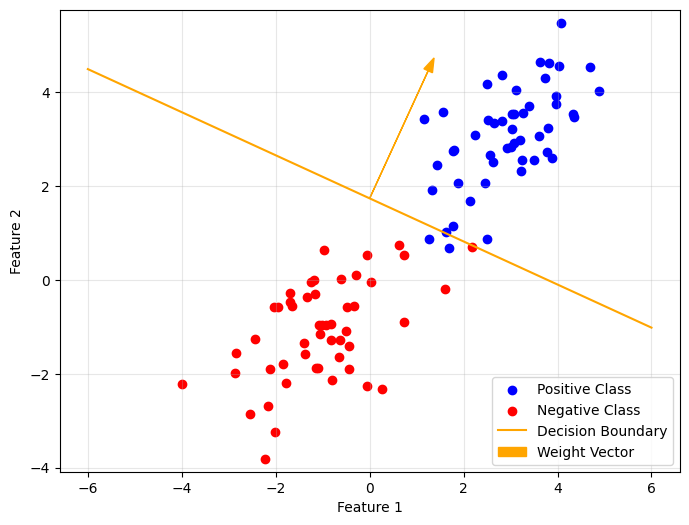

loss = 26.636772837534025


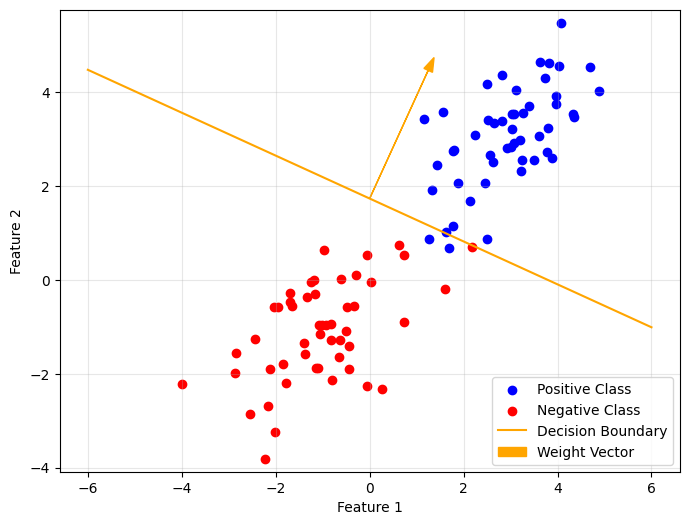

loss = 26.633874592803654


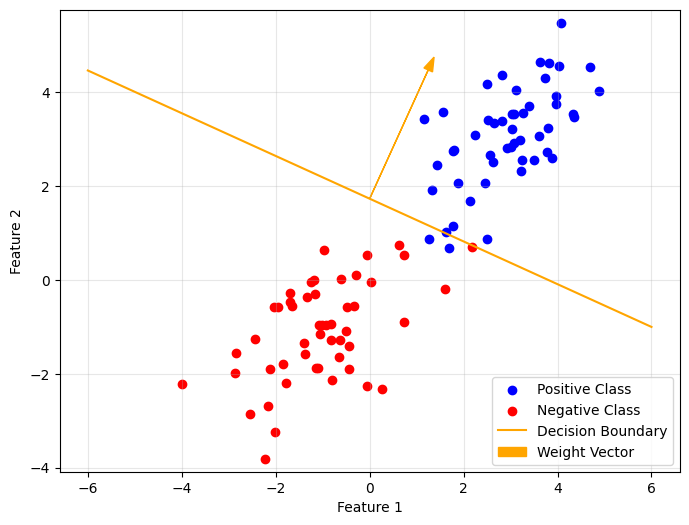

loss = 26.631022118585594


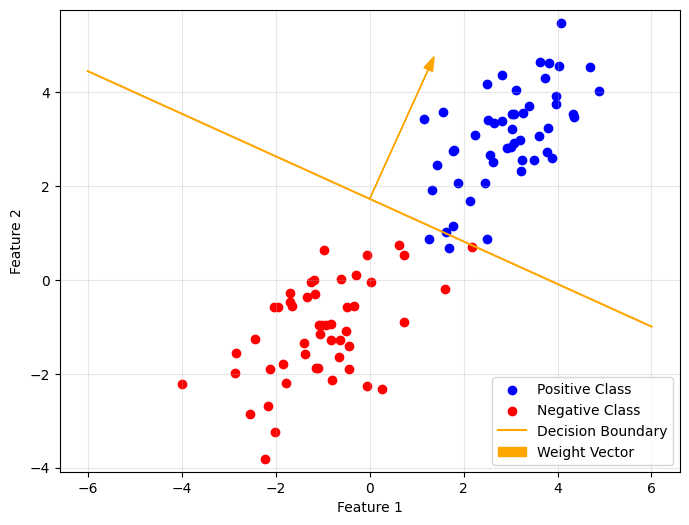

loss = 26.628214039542513


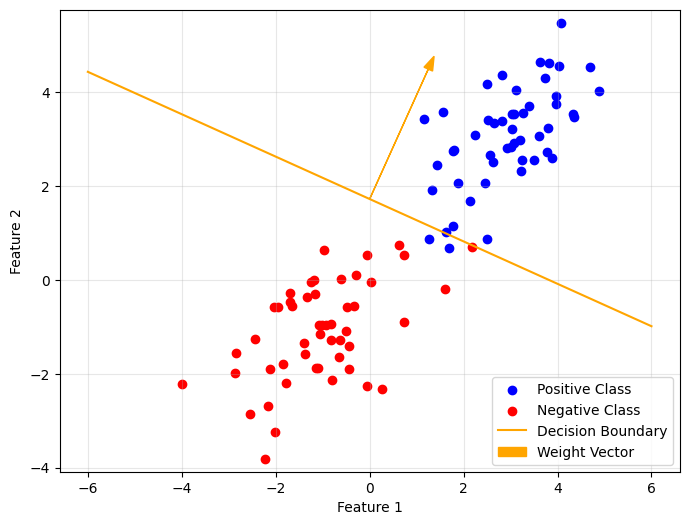

loss = 26.62544903745155


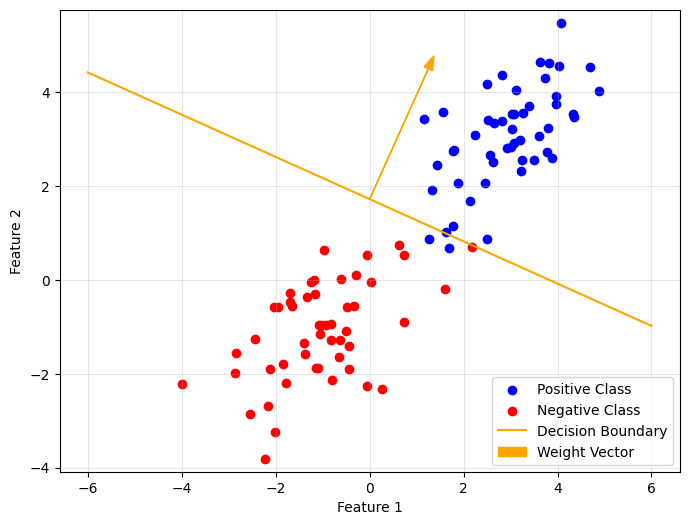

loss = 26.62272584821397


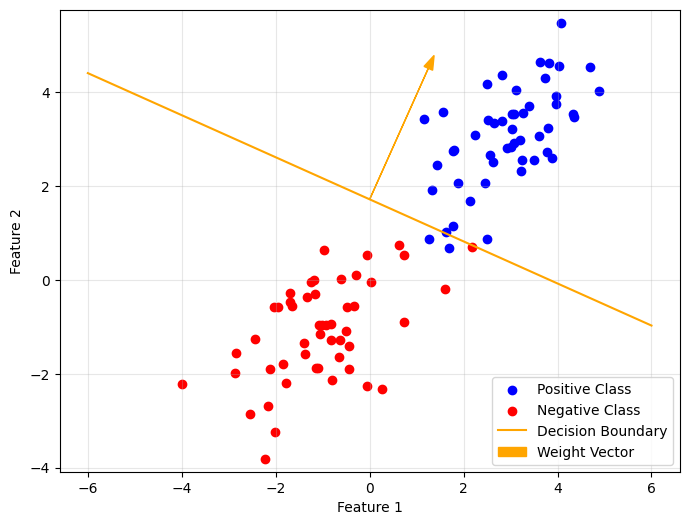

loss = 26.620043259053414


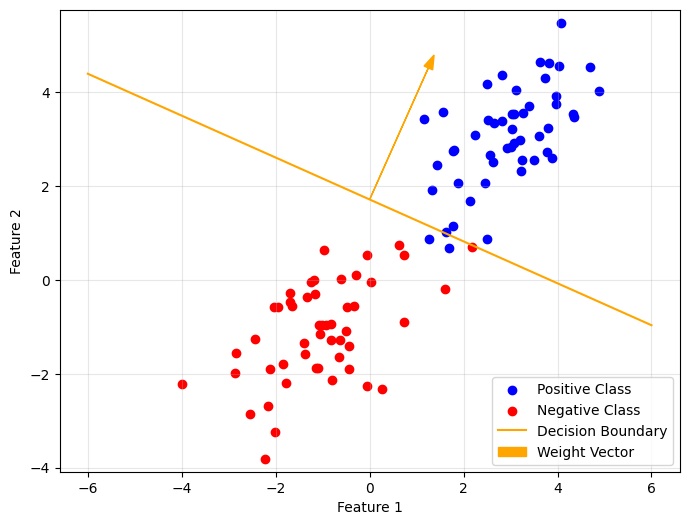

loss = 26.617400105889082


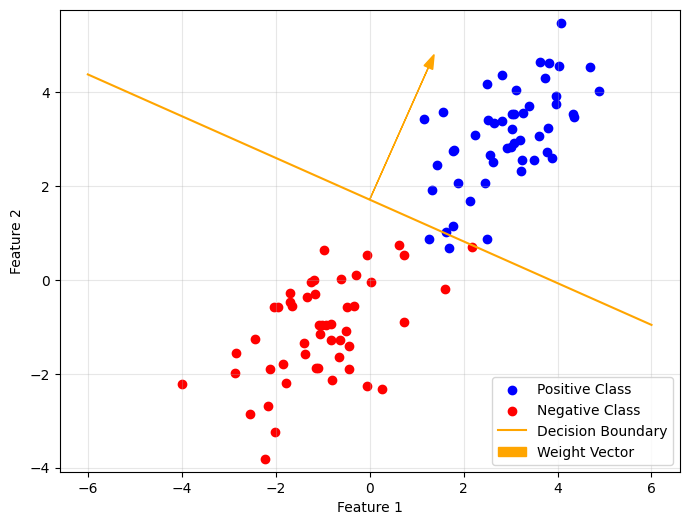

loss = 26.61479527087073


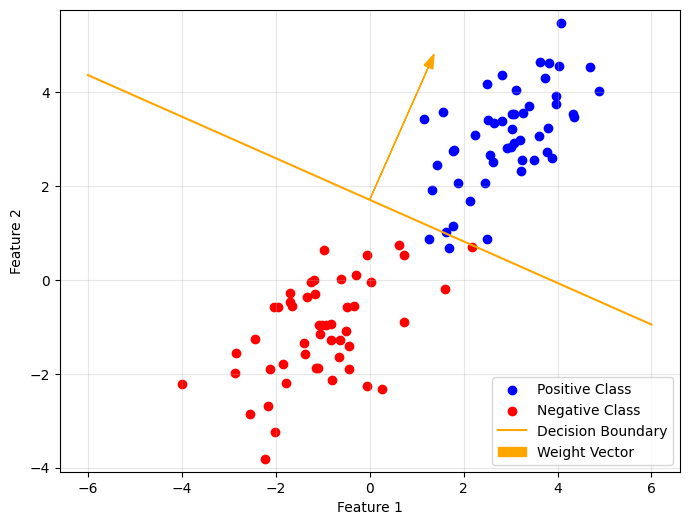

loss = 26.61222768006401


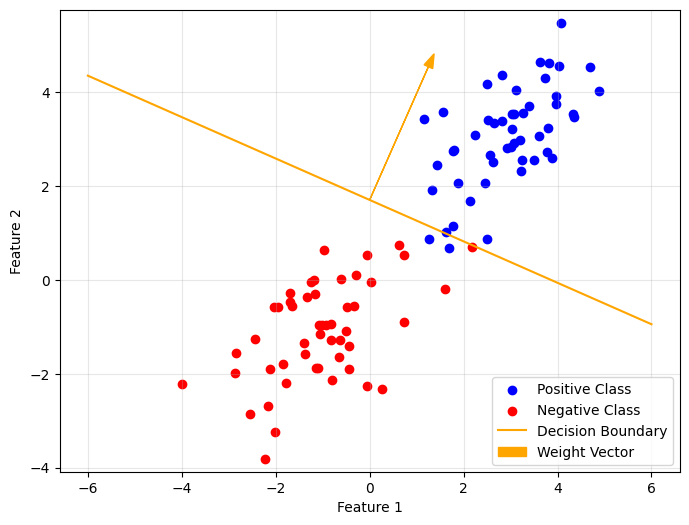

loss = 26.609696301275534


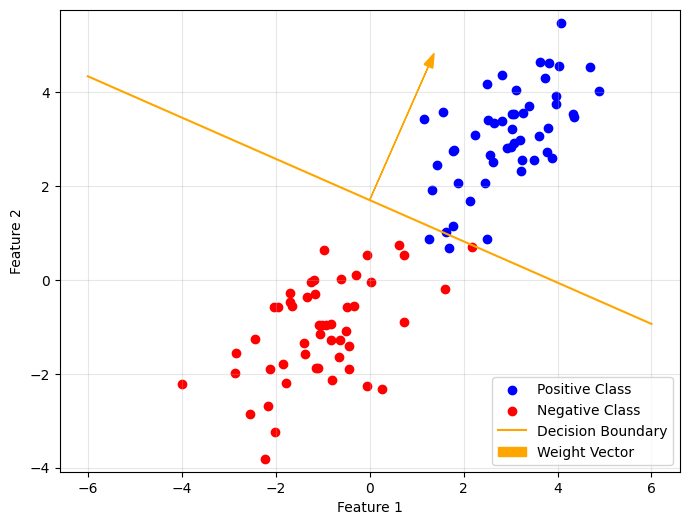

loss = 26.60720014200763


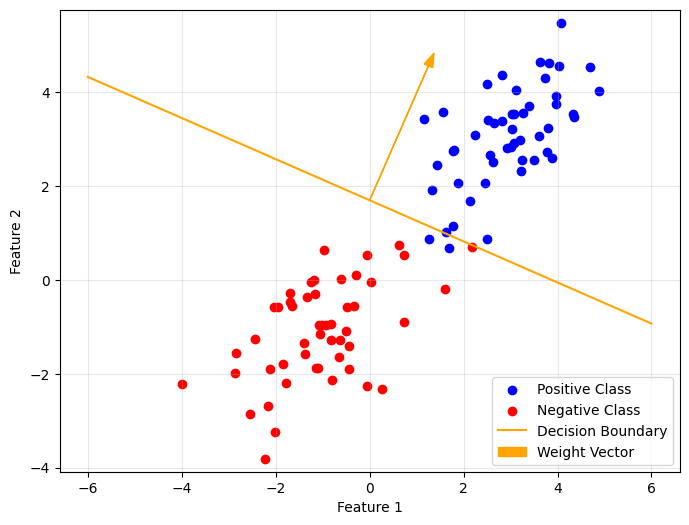

loss = 26.60473824753397


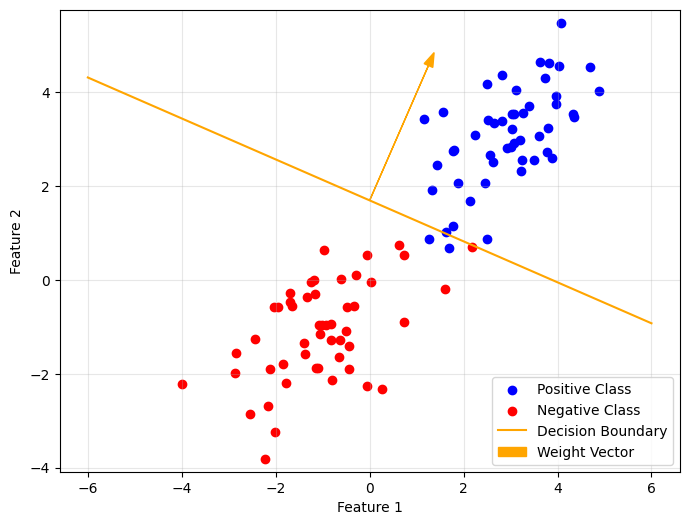

loss = 26.60230969908737


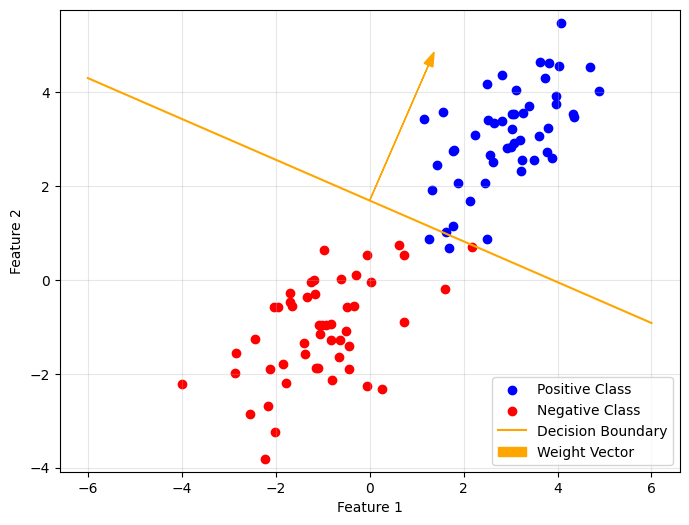

loss = 26.599913612152633


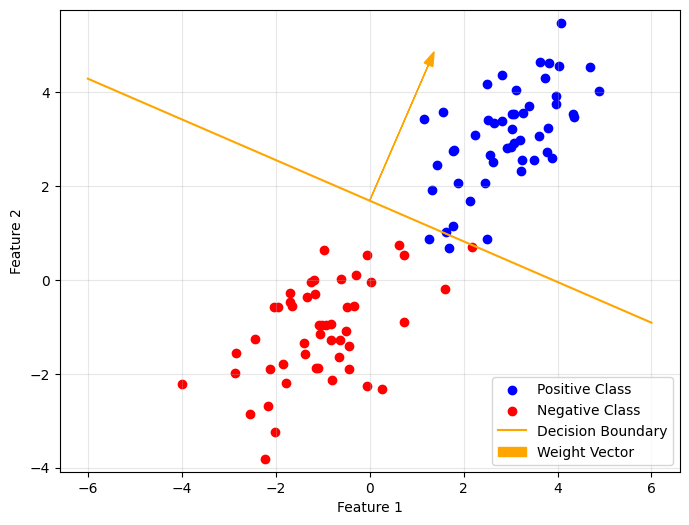

loss = 26.597549134856873


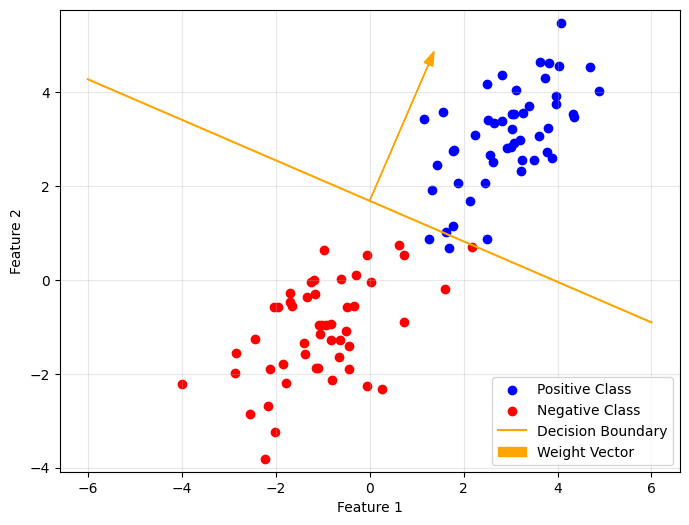

loss = 26.595215446451


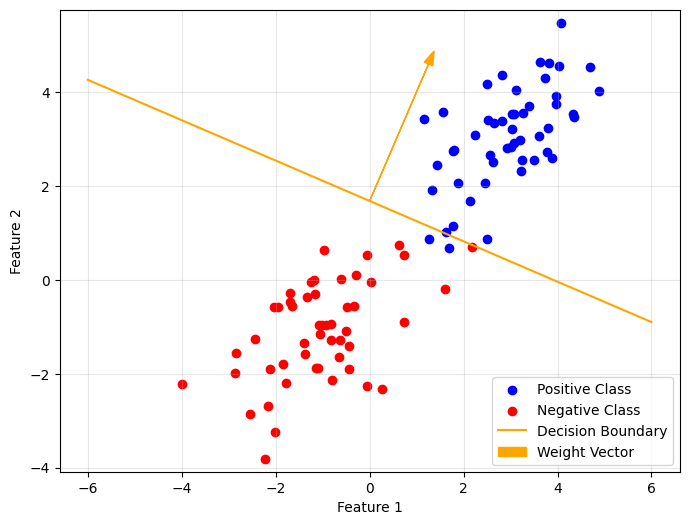

loss = 26.592911755876383


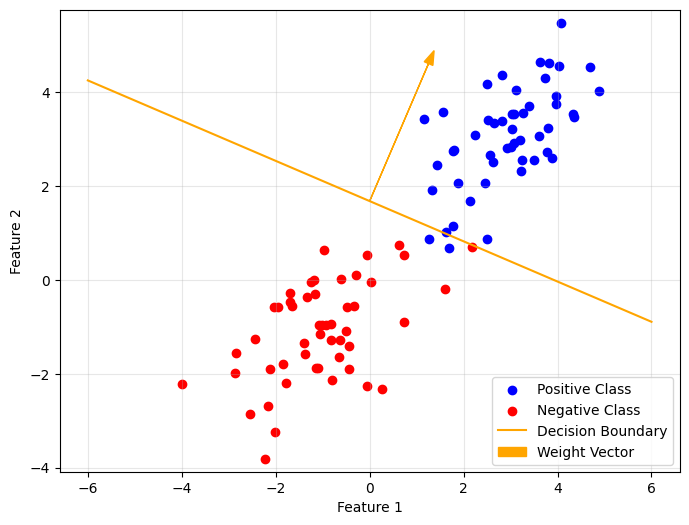

loss = 26.590637300410997


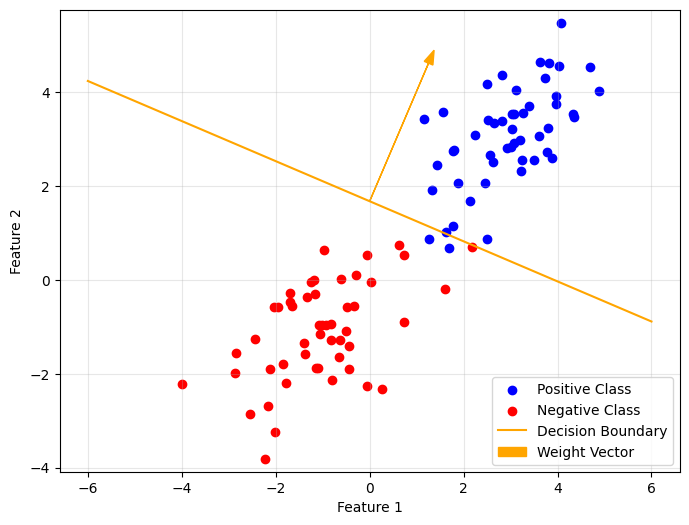

loss = 26.588391344389997


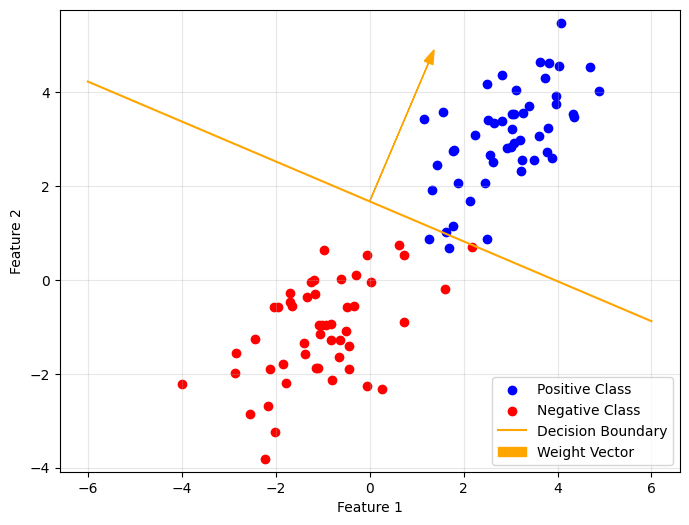

loss = 26.58617317799585


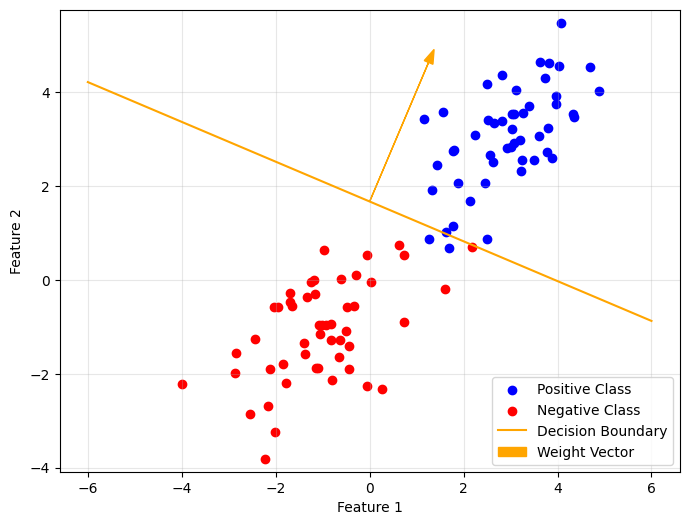

loss = 26.58398211611364


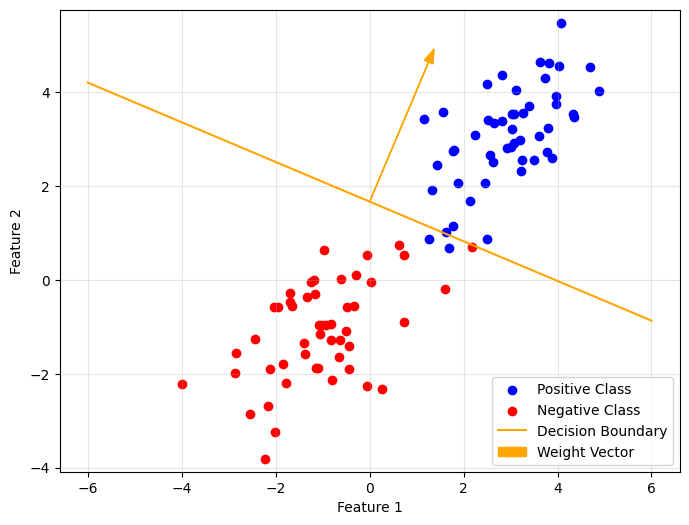

loss = 26.58181749724754


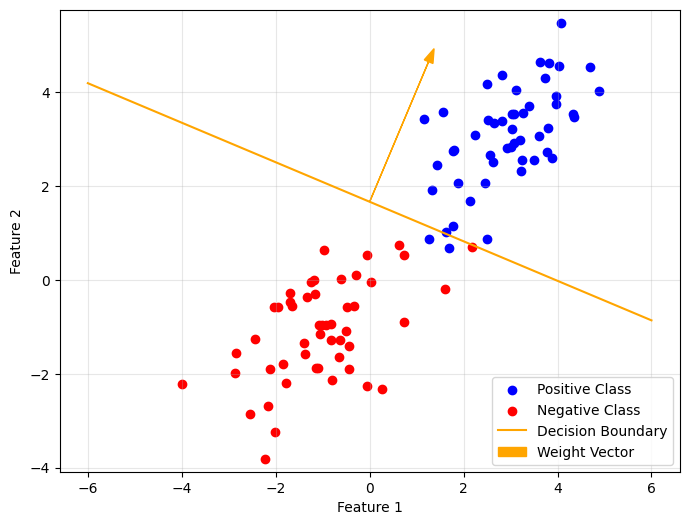

loss = 26.579678682494364


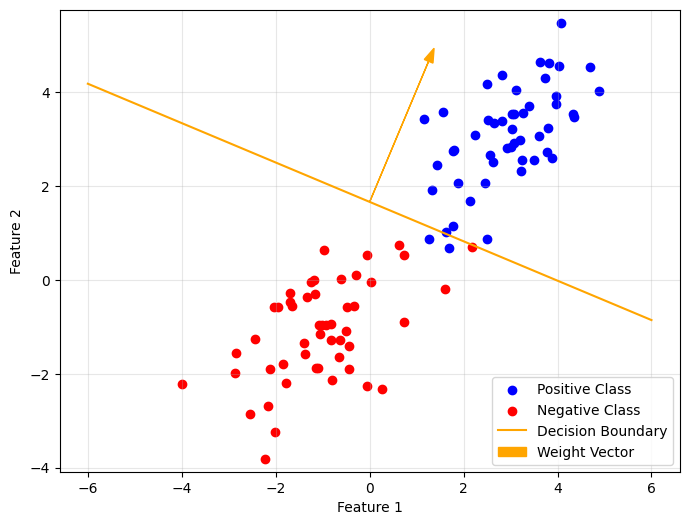

loss = 26.577565054571156


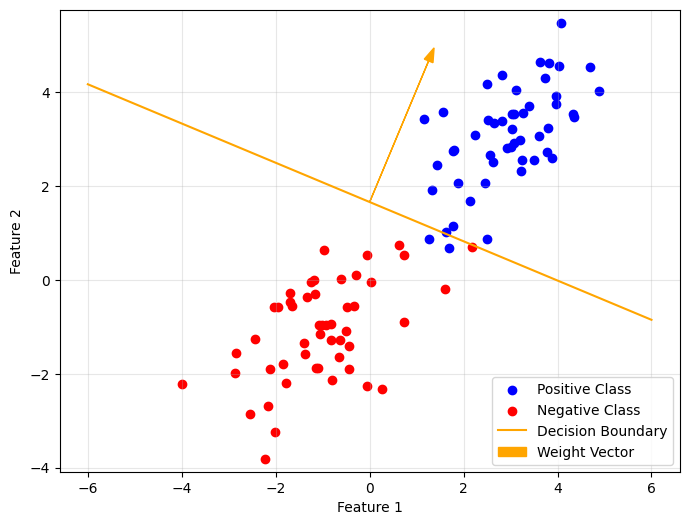

loss = 26.575476016892814


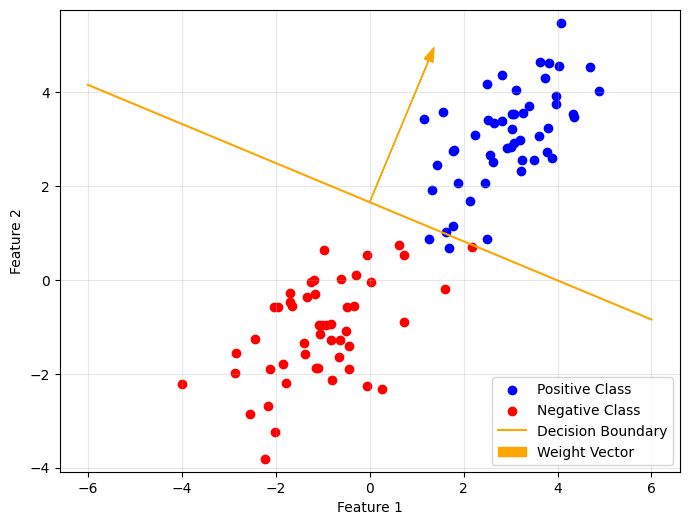

loss = 26.573410992697468


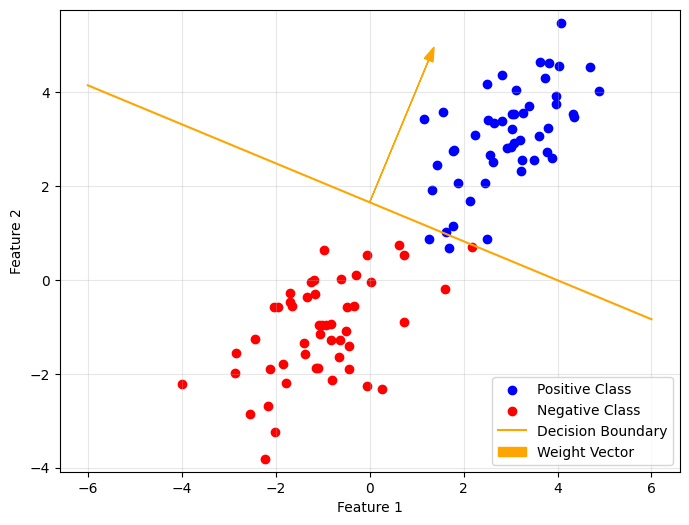

loss = 26.57136942421618


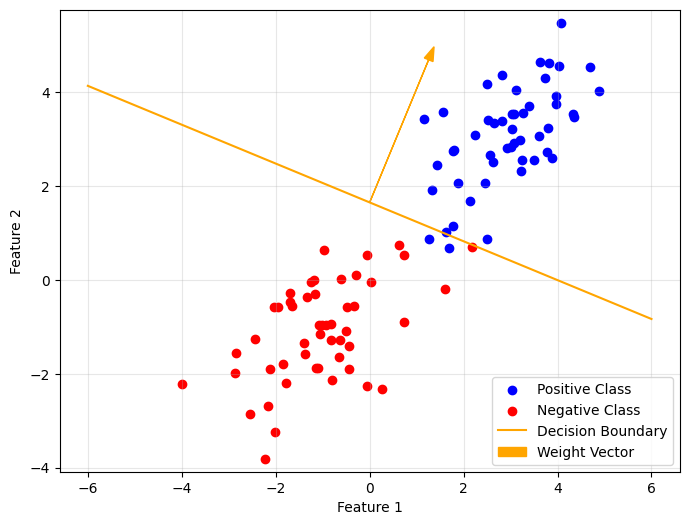

loss = 26.56935077188455


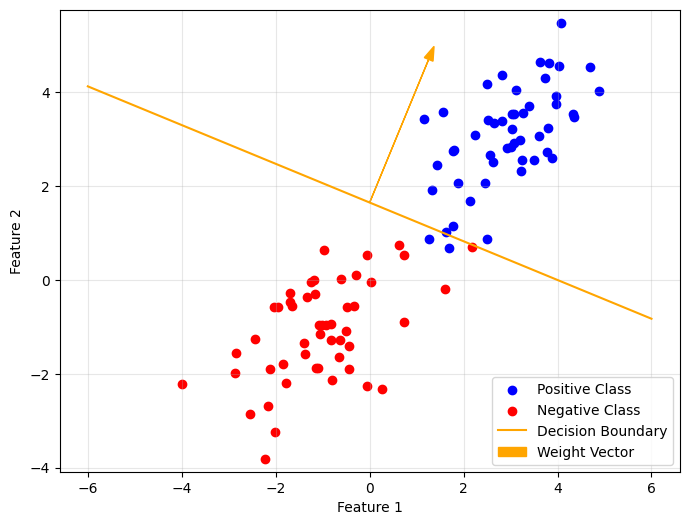

loss = 26.567354513593873


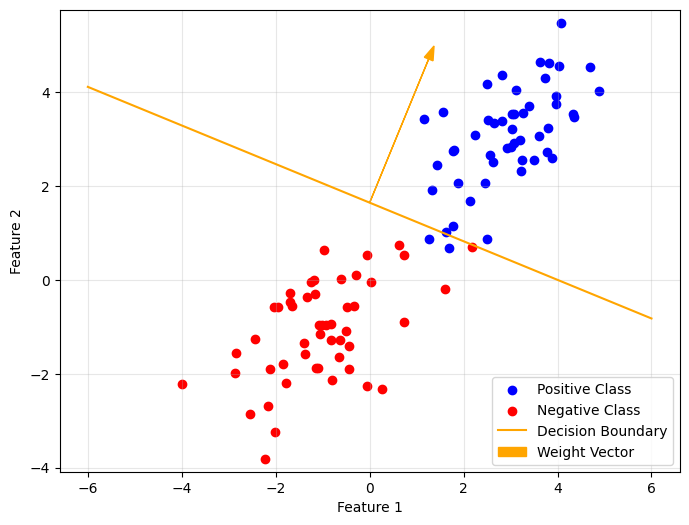

loss = 26.565380143979183


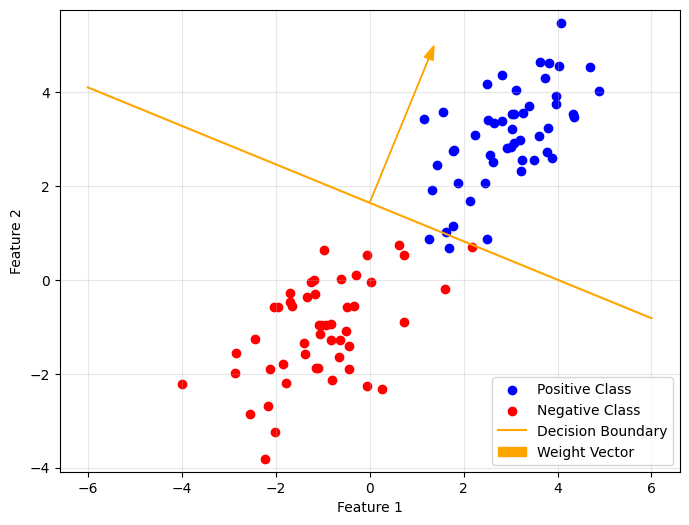

loss = 26.563427173742426


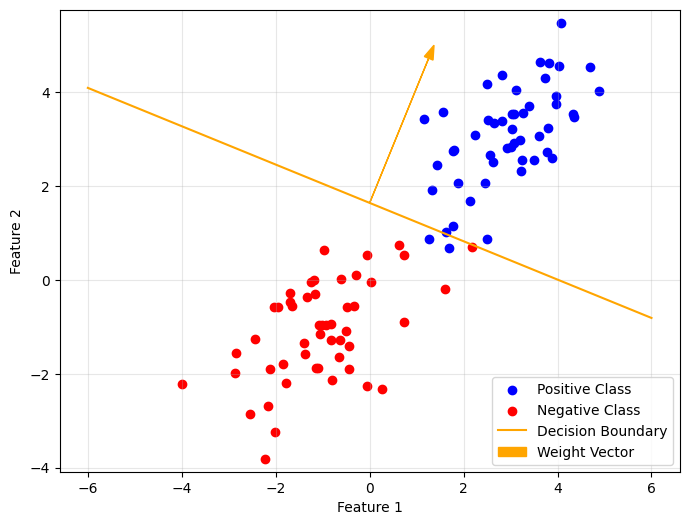

loss = 26.561495129008623


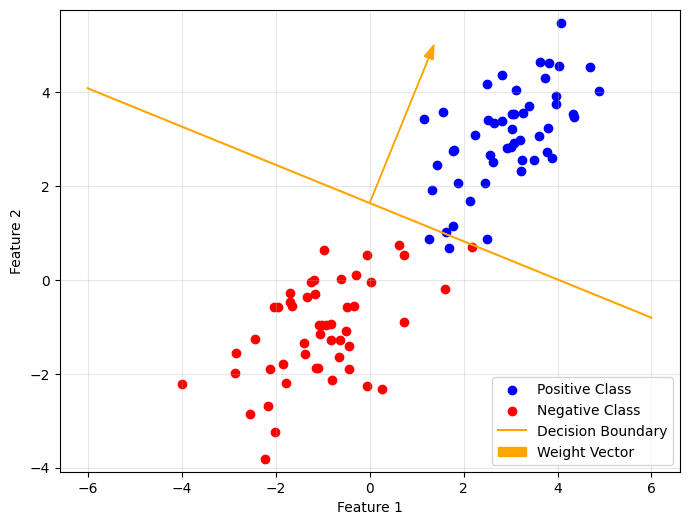

loss = 26.55958355071286


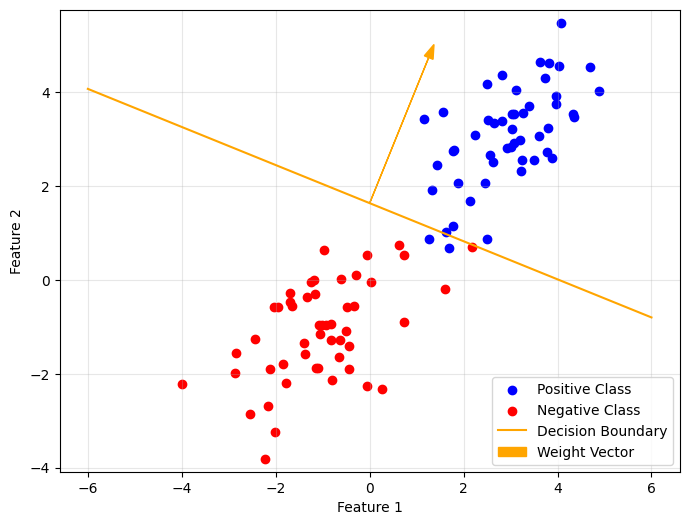

loss = 26.55769199401688


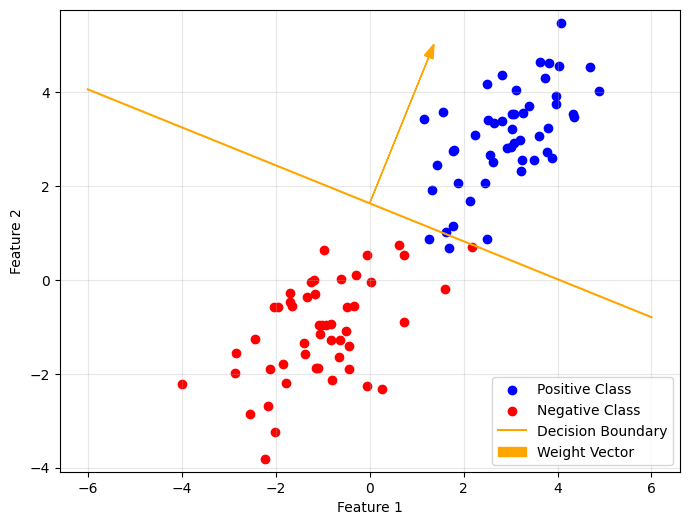

loss = 26.555820027753217


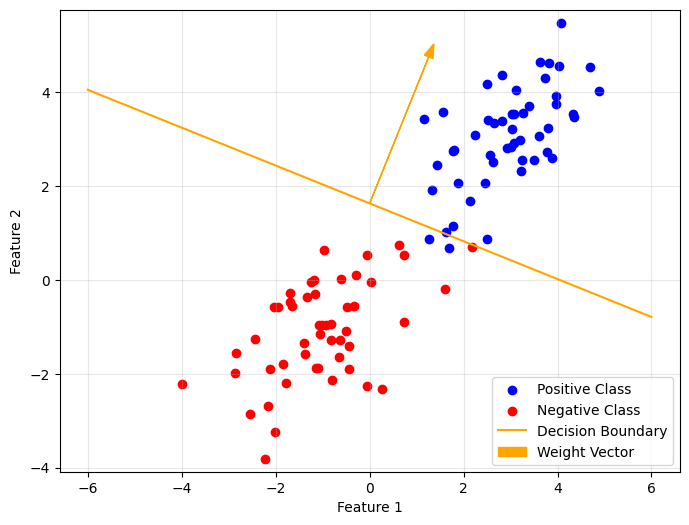

loss = 26.55396723389551


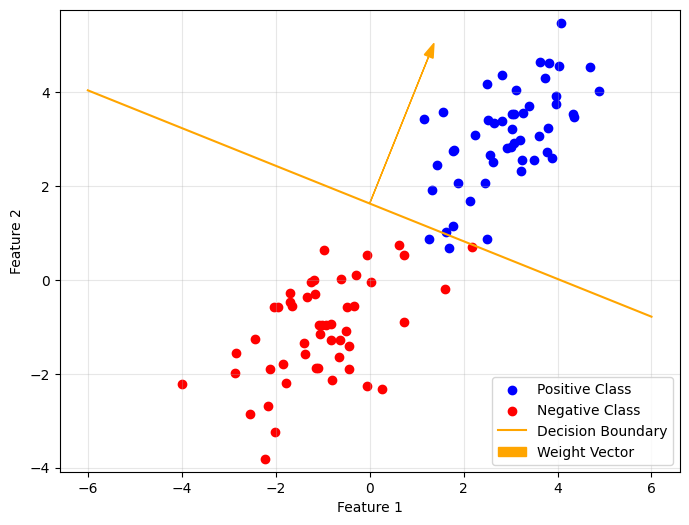

loss = 26.552133207053416


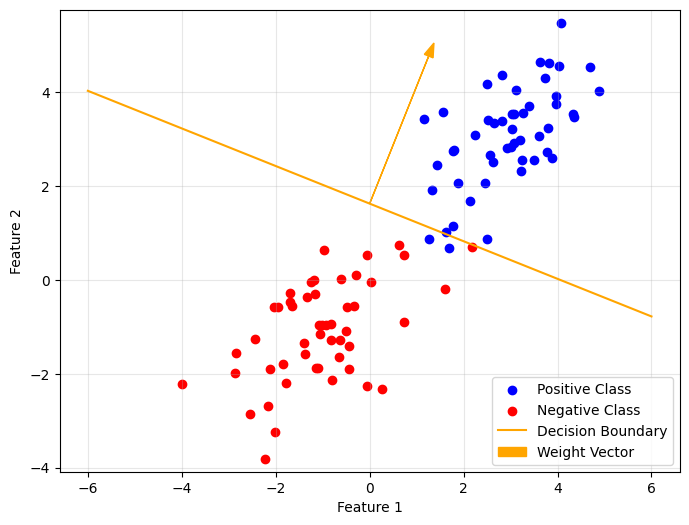

loss = 26.550317553991153


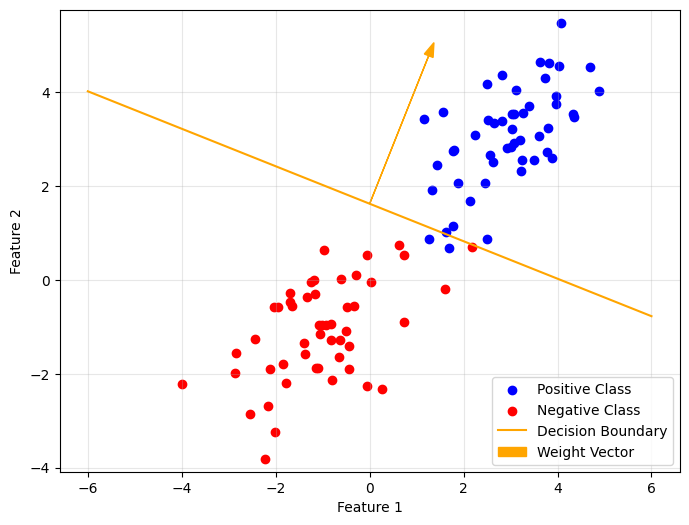

loss = 26.5485198931678


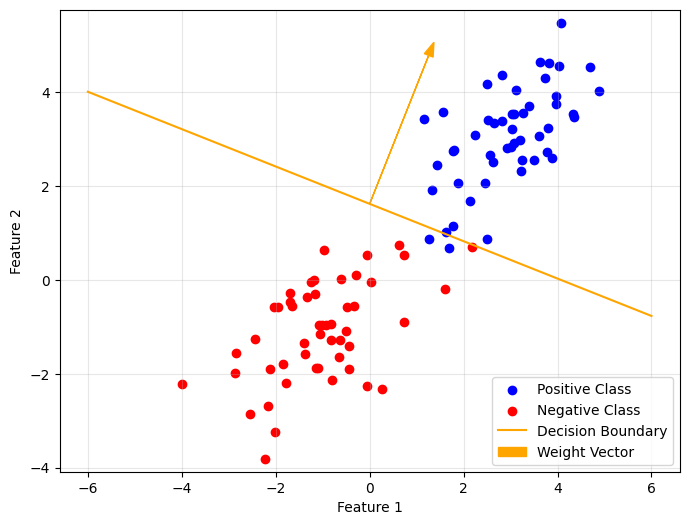

loss = 26.54673985429881


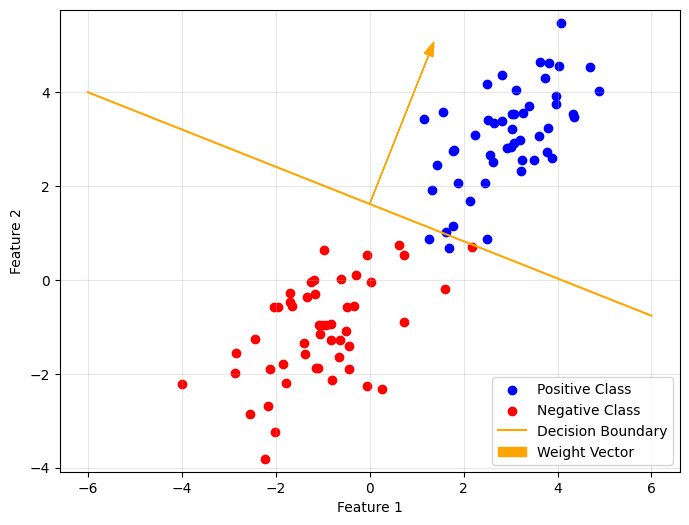

loss = 26.54497707793707


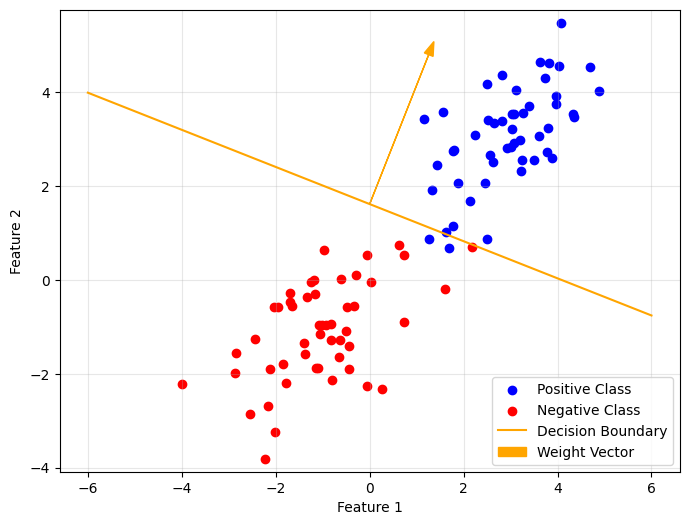

array([-5.12928469,  1.2575521 ,  3.18150018])

In [46]:
X, y = generate_data(50)  # You'd need to implement generate_data()
gradient_descent(X, y, 0.1, 100)

/var/folders/cg/rh00j5d92k9c50xwr1txz9bm0000gn/T/ipykernel_29875/309573294.py:112: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


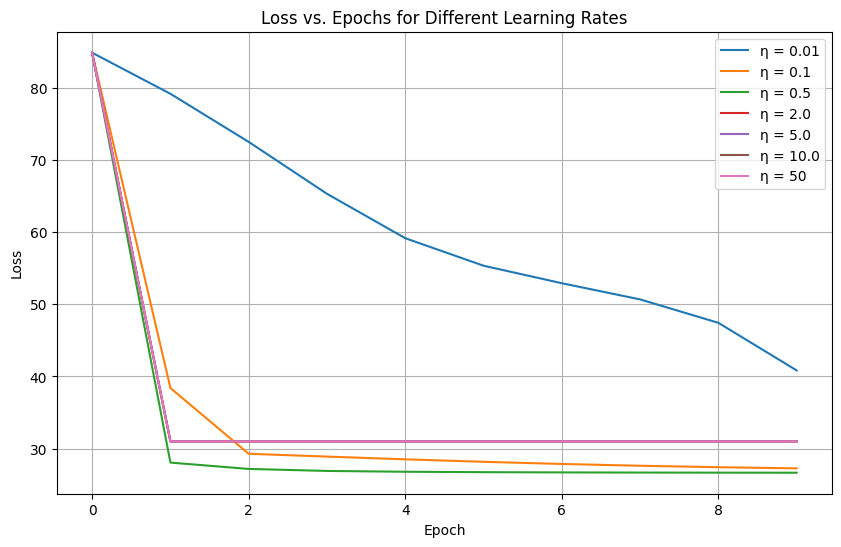

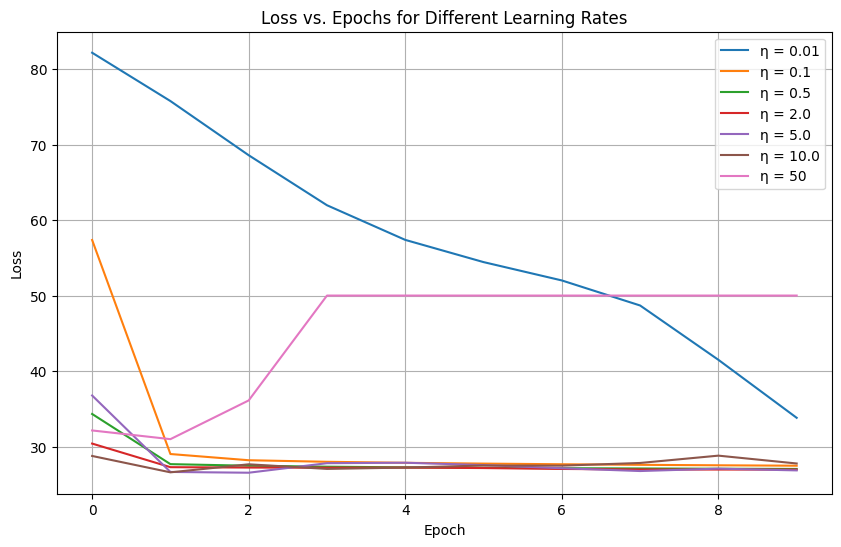

In [49]:
learning_rates = [0.01, 0.1, 0.5, 2.0, 5.0, 10.0 ,50]

# For batch gradient descent
results_batch = analyze_learning_rates(X, y, learning_rates, epochs=10, use_stochastic=False)

# For stochastic gradient descent
results_stochastic = analyze_learning_rates(X, y, learning_rates, epochs=10, use_stochastic=True)